# ============================

# **Week 6**

## Machine Learning: Clustering and Classificaion 




# ============================

In traditional programming we mainly deal with an input and we need to explicitly write program for machine to produce a desired output but in the machine learning way of programming you will give the input and output (usually a smaller set of desired outputs) and the machine will find the right program to model output.  <br>


Maching learning algorithm can be classified in two groups based on the available data:
* **Supervised learning:** In this set of algorithm we are dealing with a labeled dataset and we are trying to predict the label for future instances. Here we are trying to find the **conditional** probability for our variables given a set of known examples.  
* **Unsupervised learning:** In these methods of learning we usually have a data set without any label and we are trying to find an underlying patterns. In the language of probability, we are trying to find the probability density of the inputs. We want to come up with a **priori** probability distribution.

We are going to see that the **Supervised learning** is basically an **optimization** problem. 

In [98]:
import numpy as np 
import random 
import matplotlib.pyplot as plt


# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# **Clustering:**



Clustering is an optimization problem. But first let's define some useful concepts:

## **Variability** of a cluster: $V(c)$  
This shows how much difference exist between each element of the cluster and the mean of the cluster. 

$$
\begin{equation*}
V(c) = \sum_{x \in c} d(mean(c), x)
\end{equation*}
$$

In which $c$ is a cluster, and $d(x_0,x_1)$ is the distance between them.  [Euclidean](https://en.wikipedia.org/wiki/Euclidean_distance) or even [Minkowski](https://en.wikipedia.org/wiki/Minkowski_distance) distance)


## **Dissimilirity** of the set of clusters: $D(C)$

This is a measure for a aggregate variablility of a set of clusters. And it is defined as:


$$
\begin{equation*}
D(C) = \sum_{c \in C} V(c)
\end{equation*}
$$

### Quick note on $d(x_0,x_1)$: 

Usually we define the distance between two points to be _Euclidean_. 

If we take two vectors as $X, Y \in \mathbb{R}^M$, we define the Euclidean distance to be:


$$
\begin{equation*}
d(\vec{X}, \vec{Y}) = \sqrt{\sum_{i=1}^M (X_i-Y_i)^2}
\end{equation*}
$$


This is a special case for a more general class of distance definitions which are called the _Minkowski_ distance, which is defined as: 

$$
\begin{equation*}
d(\vec{X}, \vec{Y}) = \sqrt[n]{\sum_{i=1}^M (X_i-Y_i)^n}
\end{equation*}
$$

Mathematically speaking, this is a definition of $L^p$ spaces (_Lebesgue_ spaces) which themselves are part of Banach spaces.

Another special cases from Minkowski are the [Taxicab](https://en.wikipedia.org/wiki/Taxicab_geometry) distance (also known as Manhatan distance): 

$$
\begin{equation*}
d(\vec{X}, \vec{Y}) = \sum_{i=1}^M \|X_i-Y_i\|
\end{equation*}
$$


And the [ Tchebychev](https://en.wikipedia.org/wiki/Chebyshev_distance) distance:


$$
\begin{equation*}
d(\vec{X}, \vec{Y}) = \lim_{n \to \infty}{\sqrt[n]{\sum_{i=1}^M (X_i-Y_i)^n}}
\end{equation*}
$$


As an excersice, find the equivalent representation of a circle in 2-d Euclidian geometry, for different cases of n. 

In [99]:
def Minkowski_d(x1, x2, p = 2):
    """ Function from L^p
    This is a function for defining a general distance measure between any 
    given N-dimensional vectors:     x1, x2
    
    INPUT:
    ------
           x1 (list or array of floats) : First vector
           x2 (list or array of floats) : Second vector
           p (float) : The power in our Minkowski definition 
    
    OUTPUT:
    -------
            (float) : The Minkowski distance of power p
                      between x1 and x2 
    """
    _sum_ = 0
    for x1_, x2_ in zip(x1, x2):
        dummy = pow(abs(x1_ - x2_), p)
        _sum_+= dummy
        
    distance = pow(_sum_, 1/p)
    return distance

### Continuing on Variability of a cluster:

Now if you look at the definition of Variablity, you see that for the special case of Euclidean distance we are just missing a factor of $1/\sqrt{k}$ in which $k$ is the number of points in a given cluster, from the definition of [variance](https://en.wikipedia.org/wiki/Variance).


_What does it mean to not include the number of points in a cluster when calculating variability?_

By doing that we are assigning **higher variability** to the **larger** cluster than the smaller cluster of the **same variance**.



You may have guessed by now, that we are trying to come up with an objective function for our optimization problem. So we can ask for a set of clusters that would minimize the dissimilarity of the clusters.

But if we put a cluster on each point, we are going to get zero dissimilarity which obviously is not a useful answer. For avoiding this we need to define a constraint; for example, we can constrain the total distance between clusters to be smaller than some value, or enforce a maximum number for clusters.



# Hierarchical Clustering:

In this method of clustering we do the following:

_Naive algorithm:_

1. Assign a cluster to each point, so $N$ clusters for $N$ points.

2. Find the most similar clusters and merge them together. Now we have $N-1$ clusters.

3. We do the second part untill we get to a cluster that contains all of the $N$ points.


This is the [Agglomerative hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering#Agglomerative_clustering_example).
 

Now we need to quantify what we mean by similarity (linkage) of two clusters.


These are **Linkage Metrics**:

1. **Single-linkage**:  It is the shortest distance between any member of one cluster and any memeber of another.


2. **Complete Linkage**: It is the greatest distance between any member of one cluster and any memeber of another.


3. **Average Linkage**: It is the average distance between any member of one cluster and any memeber of another.

Let's look at the following example:

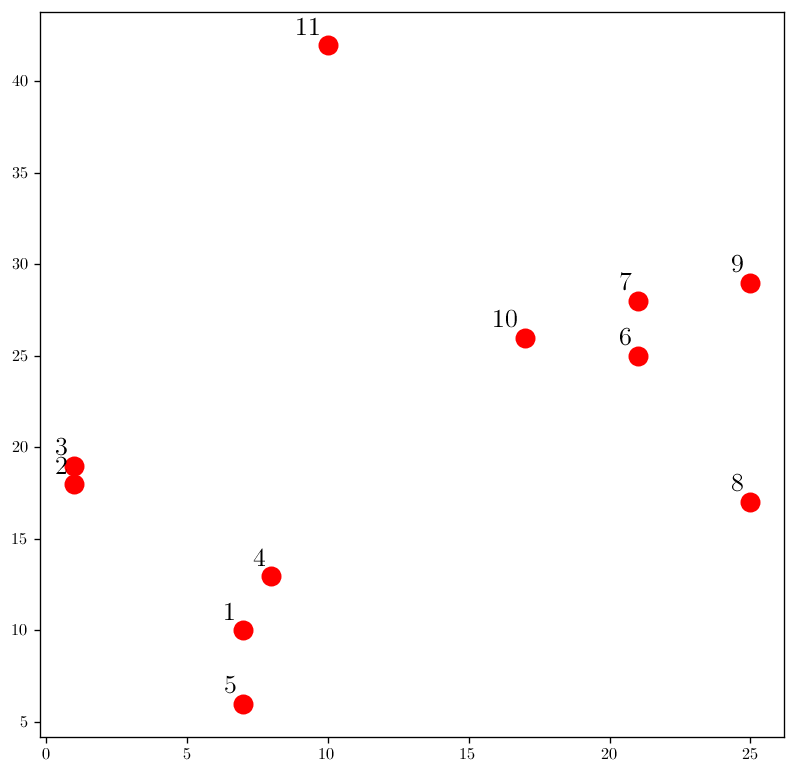

In [100]:
np.random.seed(500)

x1 = np.random.randint(0,10, 5)
x2 = np.random.randint(8,28, 6)

y1 = np.random.randint(0, 20, 5)
y2 = np.random.randint(15, 55, 6)



_x_, _y_ = list(x1), list(y1)

_x_.extend(list(x2))
_y_.extend(list(y2))
labels = np.arange(1, len(_x_)+1, 1)


plt.figure(figsize=(8,8))

plt.plot(x1, y1, "r." , markersize = 22)
plt.plot(x2, y2, "r.", markersize = 22)


for label, x, y in zip(labels, _x_, _y_):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom', fontsize=16)
plt.show()  

plt.show()

Now let's use `scipy` for creating the [dendogram](https://en.wikipedia.org/wiki/Dendrogram) for the hierarchical clustering:

In [101]:
import scipy.cluster.hierarchy

In [102]:
_data_ = np.c_[_x_, _y_]

In [103]:
links = scipy.cluster.hierarchy.linkage(_data_, method = "single", metric = "euclidean")

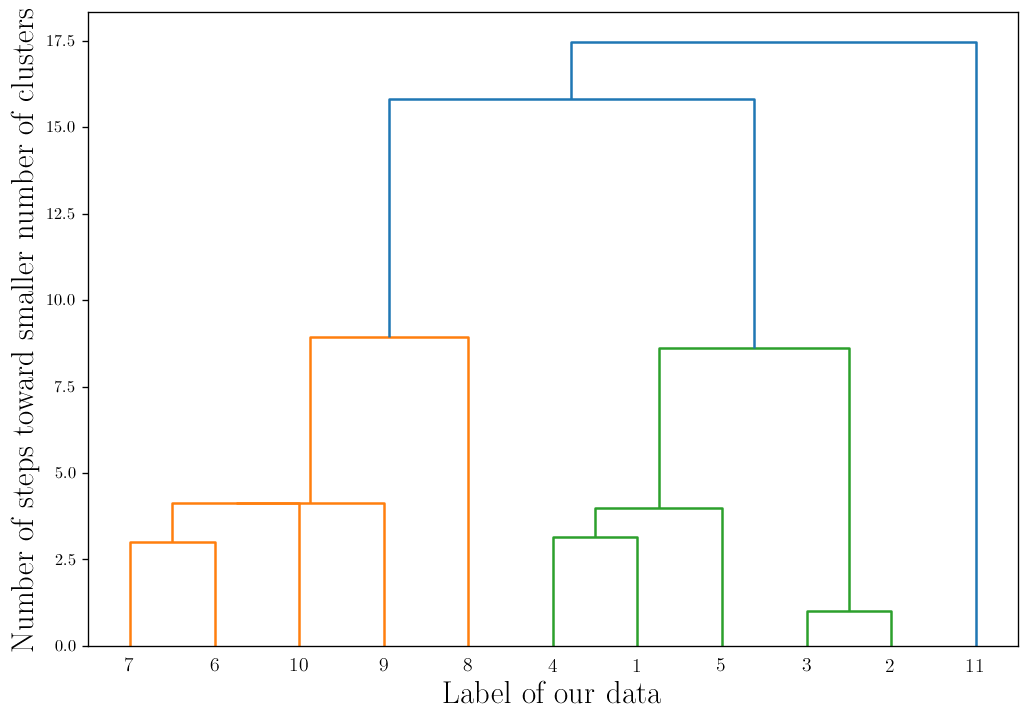

In [104]:
plt.figure(figsize = (10, 7))
scipy.cluster.hierarchy.dendrogram(links, orientation = 'top', 
                                 labels = labels, 
                                 distance_sort = 'descending',
                                 show_leaf_counts = True
                                 )

plt.xlabel(r"Label of our data", fontsize = 19)
plt.ylabel(r"Number of steps toward smaller number of clusters", fontsize = 19)
plt.show()

This is our resulting dendogram that contains all of the possible clusterings following the algorithm mentioned above.

### _few notes_:

This is completely deterministic for a given linkage metric.


The answer might not be optimal, since the hierarchical clustering is a **greedy algorithm**. In other words, your answer could be optimal but not globally optimal. 


However, this can become very slow and the number of calculations grows with $O(N^3)$ which can become useless quickly. 

_However for some linkage metrics (i.e. single-linkage), there exist $O(N^2)$ algorithms but still not very fast._

# k-means clustering:

If you know how many clusters you want then this is going to be a better choice since it is much faster. ($k$ is the number of clusters we want)

```algorithm
1. Start by randomly choosing k examples 
           as our intial centeroid. 

2. create k clusters by assiging examples 
           to closest cendroid.
           
3. Assign a new values for the centeroid: 
           The average of previous cluster configuration.
    
4. Go to (2) while centroids are changing, else break.
           We have our final configuration.
           
```  


**_Important:_** Notice that the algorithm is not deterministic and the result can change by choosing another initial configuration.

_How much time it takes to run the algorithm once before getting to the 4th line?_

For $N$ data points and $k$ clusters we need to find $kN$ distances. Which is much smaller than $O(N^2)$. Also, we will see that we do not need to go through many iteration to converge. (Relative to $N$)

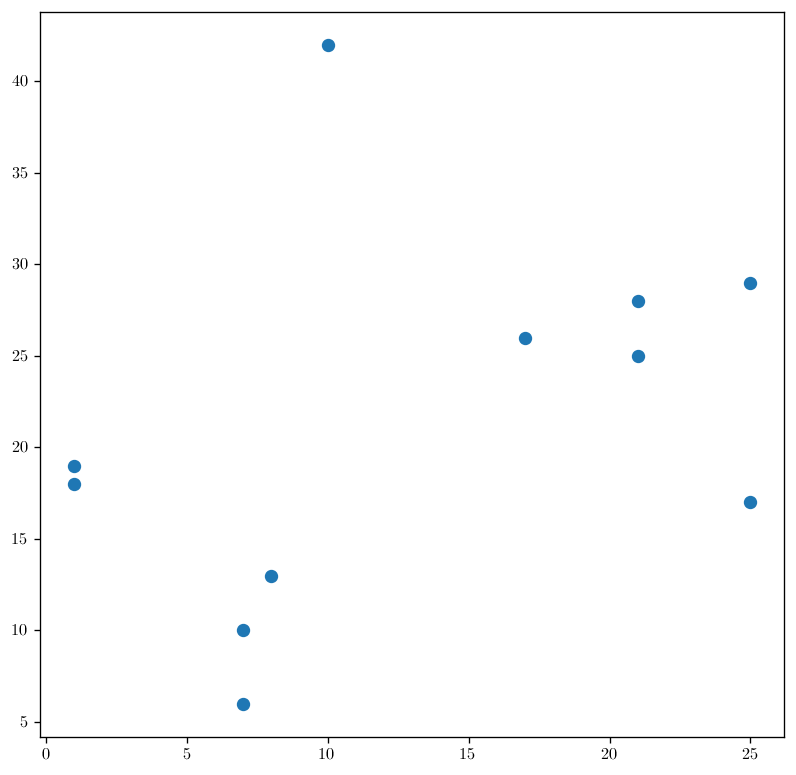

In [105]:
plt.figure(figsize=(8,8))

plt.plot(_x_, _y_, ".", markersize = 14)

plt.show()

These are some 2-d data points and you want to find a clustering for them.

## Let's define some classes!


First class is `Point` which contains information about a given data point:

In [106]:
class Point:
    def __init__(self, features, label = None, \
                 name = "Unassigned"):
        self.name = name
        self.features = features
        self.label = label
        
    # get the dimensionality of the features
    def get_dimension(self):
        return len(self.features)
    
    def get_features(self):
        return self.features
    
    def get_label(self):
        return self.label
    
    def get_name(self):
        return self.name
    
    def distance_Minkowski(self, other, p = 2):
        return Minkowski_d(self.features, other.get_features(), p)
    distance_Minkowski.__doc__ = Minkowski_d.__doc__
    
    def get_norm(self, p = 2):
        _zero_=[0 for _ in range(self.get_dimension())]
        return Minkowski_d(self.features, _zero_, p)
    
    def __str__(self):
        return self.name +" : "+ str(self.features) + ' : '\
               + str(self.label)

Our second class is the class of `Cluster`, which contains several data points. (`Point` objects)

In [107]:
class Cluster:
    def __init__(self, points):
        self.points = points
        self.centroid = self.find_centroid()
        
    def find_centroid(self):
        _sum_ = np.zeros(self.points[0].get_dimension())
        for point in self.points:
            _sum_+=np.array(point.get_features())
        Centroid_vec = _sum_/len(self.points)
        centroid = Point(Centroid_vec, name = "Centroid")
        return centroid
    
    def update(self, points):
        # Keep the old centroid
        previous_centroid = self.centroid
        # Update the Cluster attribiutes
        self.points = points
        self.centroid = self.find_centroid()
        return self.centroid.distance_Minkowski(previous_centroid)
    
    def variability(self, p = 2):
        _sum_distances_=0
        for point in self.points:
            _sum_distances_ += point.distance_Minkowski(self.centroid, p)
        return _sum_distances_
    
    
    def Elements(self):
        for point in self.points:
            yield point
            
    def __str__(self):
        names = []
        for point in self.points:
            names.append(point.get_name())
        names.sort()
        info = "Cluster Centroid: " \
               + str(self.centroid.features) +  "contains:" + "\n"
        for name in names:
            info = info + name + ", "
        return info[:-2] #remove trailing comma and space           

In [108]:
def Dissimilarity(_clusters_, p = 2):
    _tot_vari = 0
    for _cluster_ in _clusters_:
        _tot_vari += _cluster_.variability(p)
    return _tot_vari


### Driver's dataset:

Let's import a delivery fleet data set:

In [109]:
data = {}

with open("data_drivers.data", 'r') as f:
    lines = f.readlines()
    header = lines[0].split()
    
    for i, col in enumerate(header):
        x = []
        for line in lines[1:]:
            x.append(float(line.split()[i]))
            data[col] = x

In [110]:
data.keys()

dict_keys(['Driver_ID', 'Distance_Feature', 'Speeding_Feature'])

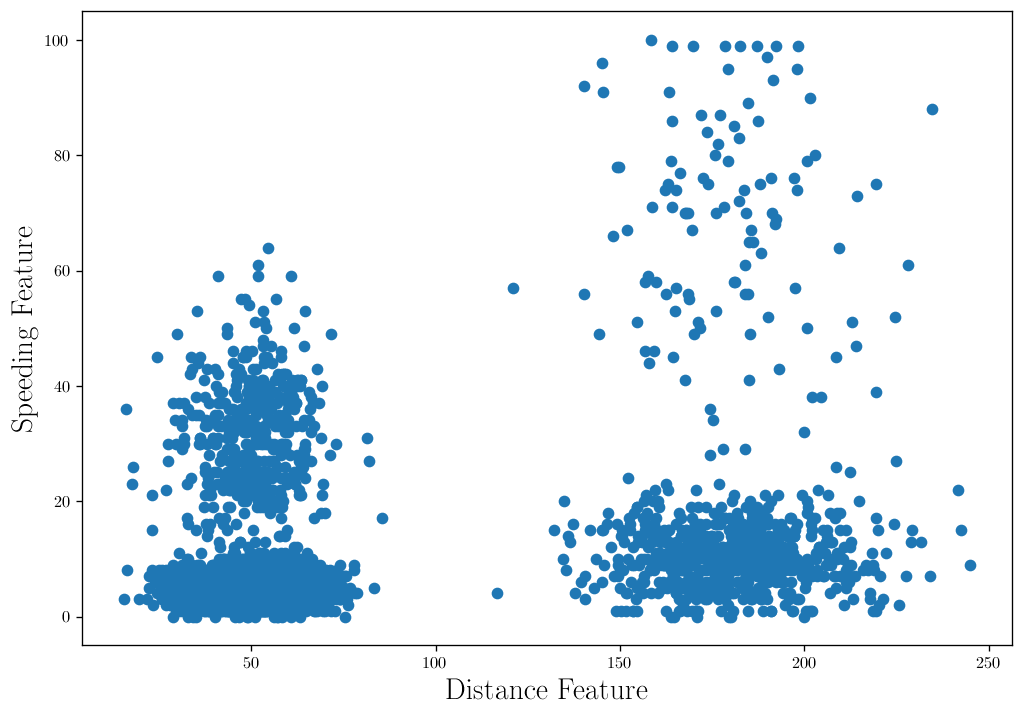

In [111]:
plt.figure(figsize=(10,7))

plt.scatter(data["Distance_Feature"], data["Speeding_Feature"])

plt.xlabel(r"Distance Feature", fontsize = 18)
plt.ylabel(r"Speeding Feature", fontsize = 18)

plt.show()

In [112]:
_points_ = []

for i in range(len(data["Driver_ID"])):
    features = [data["Distance_Feature"][i], data["Speeding_Feature"][i]]
    P = Point(features, name = data["Driver_ID"][i])
    _points_.append(P)

In [113]:
def K_Means_Clustering(points, k, verbose = False):
    # Get k random initial centroids, create cluster for each
    initial_centroids = random.sample(points, k)
    clusters = []
    for centroid in initial_centroids:
        clusters.append(Cluster([centroid]))
        
    #Iterate until centroids don't move
    converged = False
    number_iterations = 0
    while not converged:
        number_iterations += 1
        #Create a list containing k distinct empty lists
        new_clusters = []
        for i in range(k):
            new_clusters.append([])
            
        # Associate each example with closest centroid
        for p in points:
            # Find the closest centroid
            smallest_distance = p.distance_Minkowski(clusters[0].find_centroid())
            idi = 0
            for i in range(1, k):
                distance = p.distance_Minkowski(clusters[i].find_centroid())
                if distance < smallest_distance:
                    smallest_distance = distance
                    idi = i
            #Add p to the list of examples for appropriate cluster
            new_clusters[idi].append(p)
            
        for c in new_clusters: # Avoid having empty clusters
            if len(c) == 0:
                raise ValueError('Empty Cluster')
        
        # Update each cluster; check if a centroid has changed
        converged = True
        for i in range(k):
            if clusters[i].update(new_clusters[i]) > 0.0:
                converged = False
        if verbose:
            print('Iteration #' + str(number_iterations))
            for c in clusters:
                print(c)
            print('') #add blank line
    return clusters


In [114]:
clusters = K_Means_Clustering(_points_, 2)

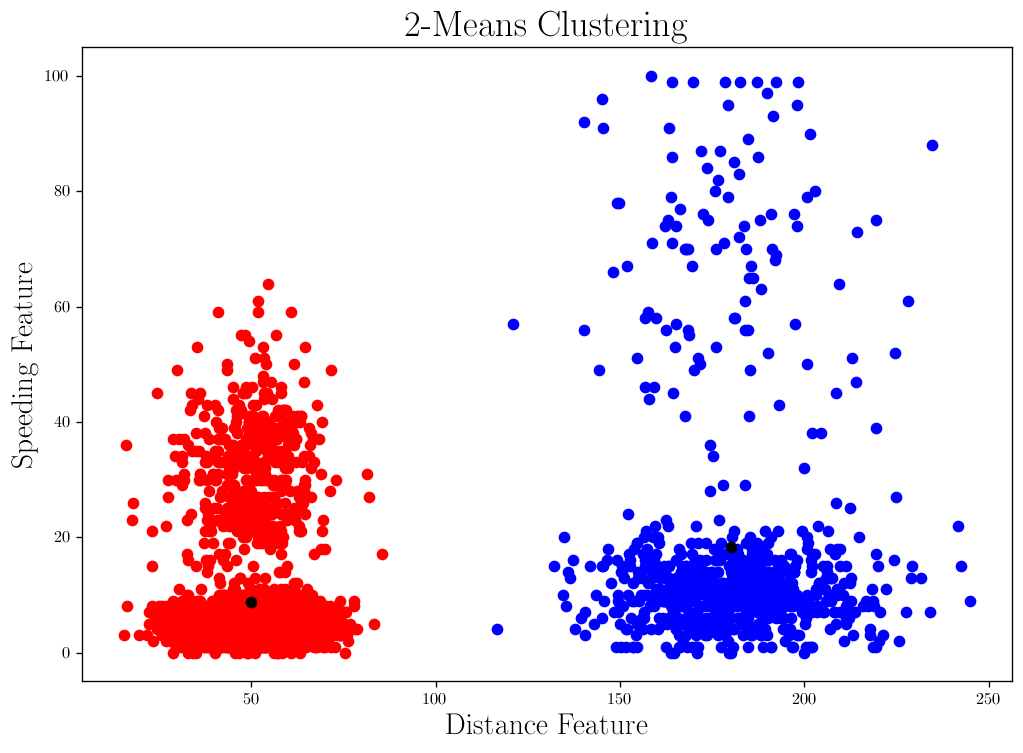

In [115]:
color = "b"

plt.figure(figsize=(10,7))

for cluster in clusters:
    for p in list(cluster.points):
        plt.scatter(p.get_features()[0], p.get_features()[1], color = color)
    color = "r"
    plt.scatter(cluster.find_centroid().get_features()[0], cluster.find_centroid().get_features()[1], color = "k")

plt.title(r"2-Means Clustering")

plt.xlabel(r"Distance Feature", fontsize = 18)
plt.ylabel(r"Speeding Feature", fontsize = 18)


plt.show()

In [116]:
clusters = K_Means_Clustering(_points_, 4)

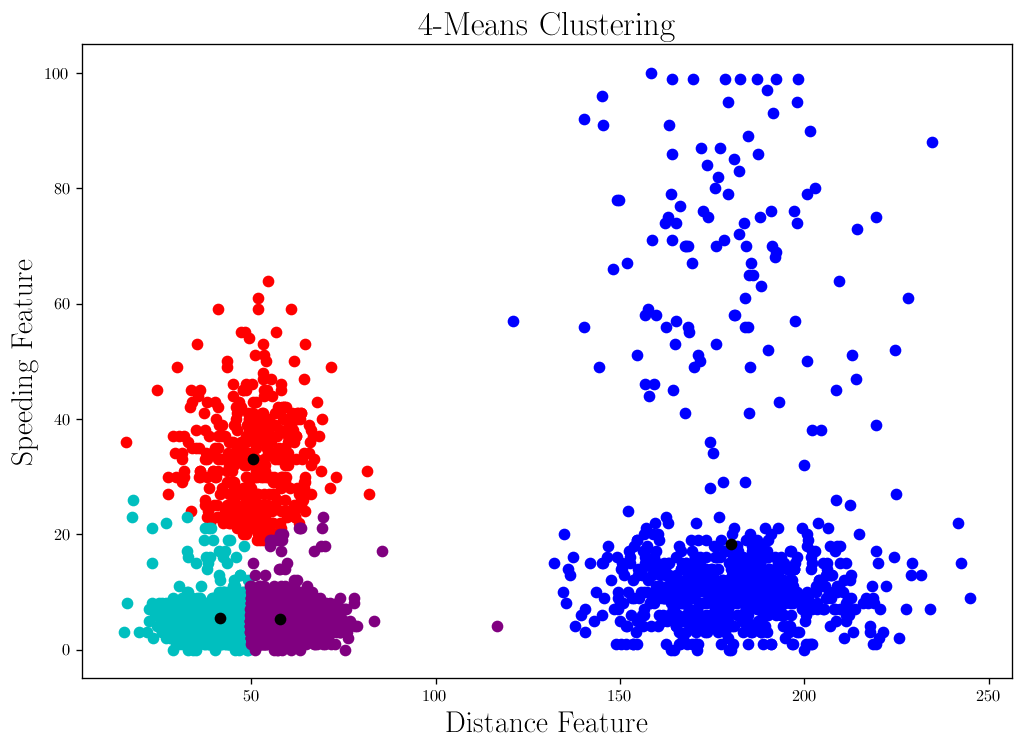

In [117]:
plt.figure(figsize=(10,7))


colors = ["b", "r", "c", "purple"]
for i, cluster in enumerate(clusters):
    for p in list(cluster.points):
        plt.scatter(p.get_features()[0], p.get_features()[1], color = colors[i])
    plt.scatter(cluster.find_centroid().get_features()[0], cluster.find_centroid().get_features()[1], color = "k")

    
plt.title(r"4-Means Clustering", fontsize = 20)

plt.xlabel(r"Distance Feature", fontsize = 18)
plt.ylabel(r"Speeding Feature", fontsize = 18)


plt.show()


# ============================

# **Week 7**

## Machine Learning: Clustering and Classificaion (2) 




# ============================

## Feature scaling:

One of the most important things to remember is that our definition of the distance give the same weight to different dimension, so we need to be careful that our data is not skewed toward a dimension. For reaching this goal we can use feature scaling methods.

One way to do this:

In [118]:
# This is called Z-scaling
def scale_feature(_feature_):
    _f_ = np.array(_feature_)
    zero_f_ = _f_ - np.average(_f_)
    std = np.std(_f_)
    return zero_f_/std

In [119]:
_points_ = []

for i in range(len(data["Driver_ID"])):
    features = [scale_feature(data["Distance_Feature"])[i], 
                scale_feature(data["Speeding_Feature"])[i]]
    P = Point(features, name = data["Driver_ID"][i])
    _points_.append(P)

In [120]:
clusters = K_Means_Clustering(_points_, 2)

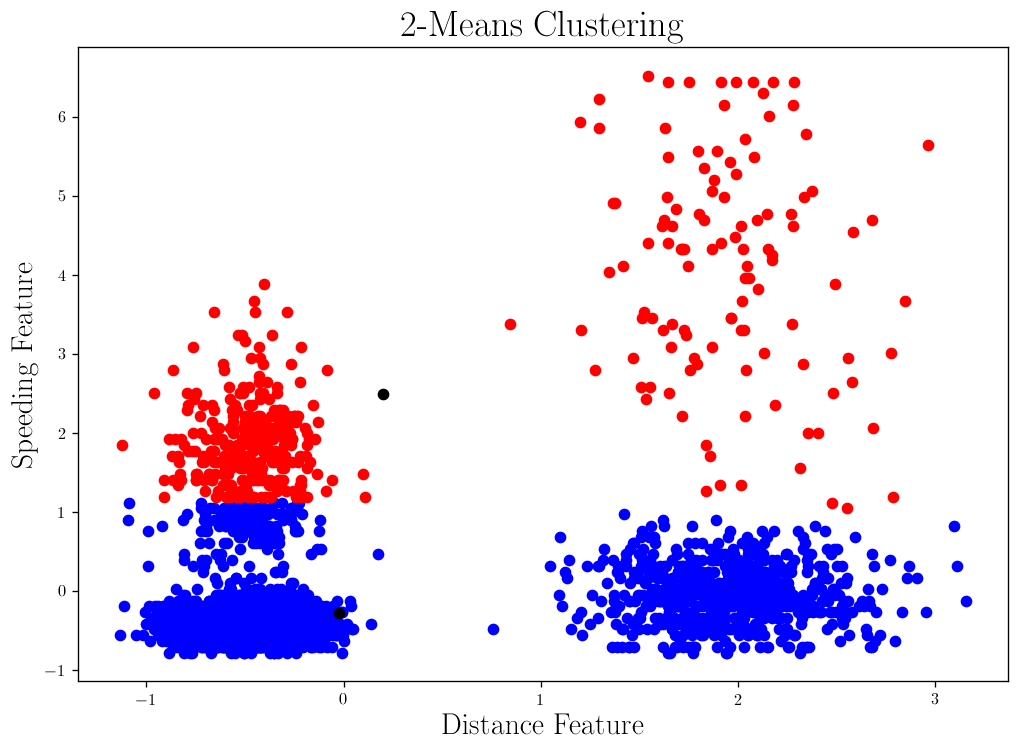

In [121]:
color = "b"

plt.figure(figsize=(10,7))

for cluster in clusters:
    for p in list(cluster.points):
        plt.scatter(p.get_features()[0], p.get_features()[1], color = color)
    color = "r"
    plt.scatter(cluster.find_centroid().get_features()[0], cluster.find_centroid().get_features()[1], color = "k")

plt.title(r"2-Means Clustering", fontsize = 22)

plt.xlabel(r"Distance Feature", fontsize = 18)
plt.ylabel(r"Speeding Feature", fontsize = 18)


plt.show()

This seems more natural with respect to the 4-Means we did for the raw data in which the 4 clusters were different from what we see here. 

This shows how important feature scaling can be!

### How can we determine the number of clusters ($k$)?


1. Usually we use our prior knowledge about the data. 
   * There are six type of plants. $k=6$
   * There are five personality types. $k=5$
   * There are two kinds of galaxy mergers. $k=2$


2. Searching for $k$
   * We can search through different values of $k$ and find the optimal.
   * Using hierarchial clustering on subset of data

### How can we make sure that we are not using a bad initial centroid?

```algorithm
   Choose multiple sets of initial centroid at random

   Run the k-means algorithm on above initial centroids
  and find the solutions. Select the set of clusters for 
  which Dissimilarity (D(C)) would be minimized, at least
  for our set of solutions. 


```

# Classification:

In the last part on clustering we were able to develop our first unsupervised learning algorithm. Here we are going to see how a supervised algorithm works. But first let's talk about _supervised learning_.

## Supervised learning: 

* **Regression**: 
    * Fitting curve to data
    * Finding a Real valued measure for data vector. (features)
    
    
    
* **Classification**:
    * Asscociate each data vector to a label. (N-dimensional vector of features to a discrete value which are the labels.) 

## Nearest Neighbour: 

One of the most commonly used algorithm for classification is **nearest neighbour**. In which you just remember the data you trained on and you will not perform any fancy manipulation on the data. 


Basic algorithm is as follows:

```algorithm
 * Find the nearest example from the training data to the new data.
 
 * Assign the known label of that example to your new data. 
```

Let's imagine the following labeled points in your data set:

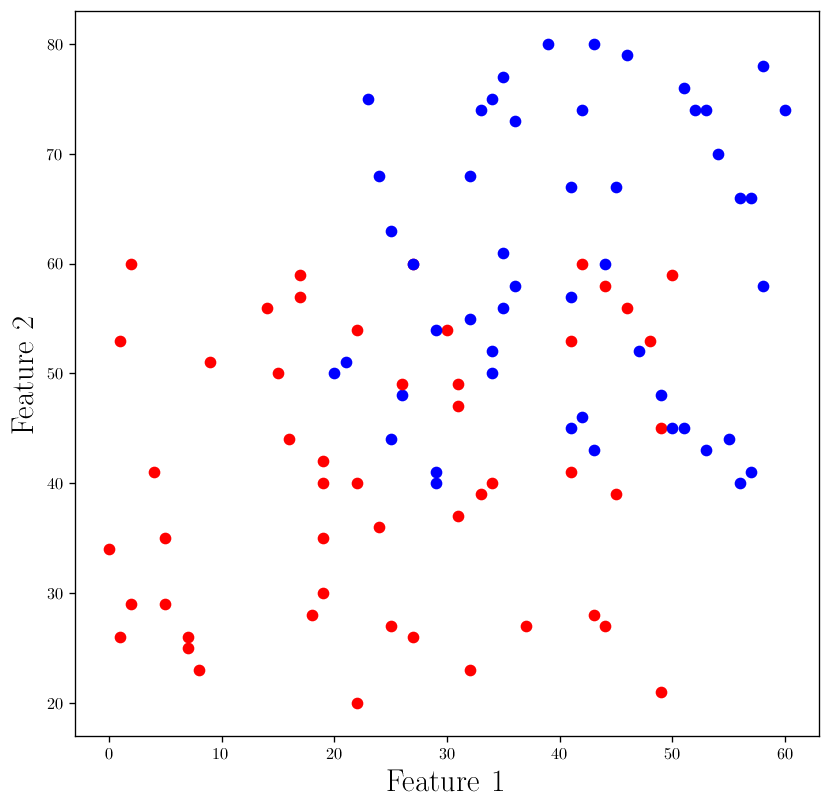

In [122]:
fig_cl_1 = plt.figure(figsize=(8,8))

group_1, group_2 = [], []
random.seed(50)



for i in range(50):
    _p_ = Point([random.randint(0, 50), random.randint(20, 60)], label="red")
    group_1.append(_p_)
    plt.scatter(_p_.get_features()[0], _p_.get_features()[1], color = "r")
    
    
    _p_ = Point([random.randint(20, 60), random.randint(40, 80)], label="blue")
    group_2.append(_p_)
    plt.scatter(_p_.get_features()[0], _p_.get_features()[1], color = "b")

plt.xlabel(r"Feature 1", fontsize = 19)
plt.ylabel(r"Feature 2", fontsize = 19)

plt.show()

Now let's say we have a new data point which we are trying to assign the labels "red" and "blue" to it based on the training data. (data we already have)



The easiest way to deal with that is to consider the label from the **nearest neighbour** in terms of our distant measure.

In [123]:
new_data = [36, 49]


New_data = Point(new_data, label="None")

In [124]:
groups = group_1
groups.extend(group_2)



minimum_distance = New_data.distance_Minkowski(group_1[0])

for point in groups:
    _distance_ = New_data.distance_Minkowski(point)
    
    if _distance_<= minimum_distance:
        minimum_distance = _distance_
        New_data.label = point.get_label()
        print(minimum_distance, New_data.label)

13.0 red
9.219544457292887 red
5.385164807134504 red
5.0 red
3.605551275463989 blue
2.23606797749979 blue


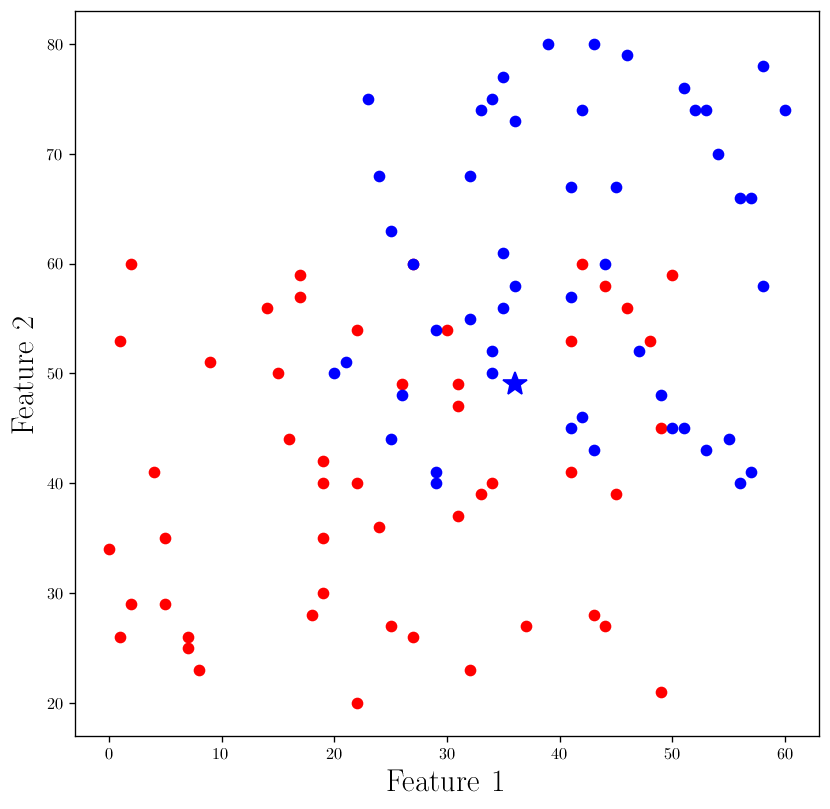

In [125]:
fig_cl_1 = plt.figure(figsize=(8,8))

for point in groups:
    plt.plot(point.get_features()[0], point.get_features()[1], ".", 
             color = point.get_label(), markersize = 12)

    
plt.plot(New_data.get_features()[0], New_data.get_features()[1], "*",
         color = New_data.get_label(), markersize = 15)

plt.xlabel(r"Feature 1", fontsize = 19)
plt.ylabel(r"Feature 2", fontsize = 19)

plt.show()

And you can see with our code we found the nearest element in the data set to our  new data (star) and we assigned the closeset existing label.

This approach has a problem since we only look at the nearest neighbour in which we can mislead us quite easily particularly if we have a noisy data set. For avoiding this issue we will introduce another method:

And you can see with our code we found the nearest element in the data set to our  new data (star) and we assigned the closeset existing label.

This approach has a problem since we only look at the nearest neighbour in which we can mislead us quite easily particularly if we have a noisy data set. For avoiding this issue we will introduce another method:

## K-Nearest Neighbours: (KNN)

This is very similar to nearest neighbour algrithm but this time we are 
looking for K nearest neighbours and to take the most occured label of those K neighbours as your prediction for new data. 

All that said, you should remember that by increasing K you are making the size of your "true" labes more relevant. Which will increase your error in predicting labels for new data.
   

## ------------------------------------------------------------
## Machine Learning: Regression, Gradient Descent, Decision Trees
## ------------------------------------------------------------

We have already worked with the idea of regression when we were fitting line through our data set. But first let's talk about **supervised learning** algorithms in general. 


## Supervised learning:


These are the concepts to know:

### Training set:

Imagine that you have $N$ example such as $(\vec{x}_1, y_1)$, $(\vec{x}_2, y_2)$, ... $(\vec{x}_N, y_N)$. In which $\vec{x}$ is the vector of features, and $y$ is the output of that given $\vec{x}$.

We assume that there is an underlying function that give the values for each $y_i$, so basically $y = f(\vec{x})$. The task is to find the a function $g$ that is best representation of the unknown $f$.


Notice that we did not talk about $\vec{x} \in \mathbb{R}^n $. They can get any value and not restricted to numbers.


### Hypothesis:

Our approximation function $g$ is called hypothesis. And our task is to find the best hypothesis in the space of all the possible hypotheses or **hypothesis space** ($\mathbb{H}$). As you can see we are not looking to find $f$, so there are more than one hypothesis that can fall into our confidence interval.



### Test set:

The way we can make sure that we are on the right track and to monitor our hypothesis performance we separate the original data set into trainging and test sets in a random manner. Basically, we make sure that we have two disctint sets of examples.


So we are trying to learn from the training data to come up with the "best" hypothesis. We do not required $f$ to be deterministic. So we can even learn from the stochastic function by coming up with the $p(y|\vec{x})$.


When we have a finite set of values for $y$ the call the learning problem **classification** and it is also known as Boolean or binary classification when we have only **two** possible oucomes. 


But when we are dealing with a real-valued numbers we call the learning problem **regression**. And we are not trying to find the "real" value of $y$, we are only interested in a conditional excpectation of $y$ or $p(y|\vec{x})$.

We have already saw an example for both, fitting curve for regresson and K-neareset neighbours for classification. 

Now let's go back to our regression problem: 

$$
\begin{equation*}
y_j = f(\vec{X_j})
\end{equation*}
$$

And let's assume that we have a $n$ dimensional array of inputs for each example. (Array of features $X_j$) And each feature vector has a corresponding weight $\vec{w} = (w_1, w_2, ..., w_n)$

$$
\begin{equation*}
g(\vec{x}_j) = w_0 + \sum_{i=1}^n w_i X_{j, i}
\end{equation*}
$$

For convenience we can add a dummy feature $x_{j,0} = 1$.and  So we can write:

$$
\begin{equation*}
g(\vec{X}_j) = \sum_{i=0}^n w_i X_{j, i} = \vec{w} . \vec{X}_j = X \vec{w} 
\end{equation*}
$$

We can find the value for $\vec{w^*}$ by solving the matrix equation analytically.


$$
\begin{equation*}
X \vec{w} = \vec{y}
\\
X^\intercal (X \vec{w}) = X^\intercal (\vec{y})
\\
(X^\intercal X)^{-1} (X^\intercal X) \vec{w} = (X^\intercal X)^{-1} X^\intercal \vec{y}
\end{equation*}
$$

Which finally leads to:

$$
\begin{equation*}
\vec{w} = (X^\intercal X)^{-1} X^\intercal \vec{y}
\end{equation*}
$$



The vector $\vec{w}^*$ can be found to be the best answer, by minimizing the squared-error loss on all of the examples: 


$$
\begin{equation*}
\vec{w}^* = argmin_w \sum_j L_2(y_j, \vec{w}.\vec{X_j})
\end{equation*}
$$




In which $X$ is the matrix of the data. Let's look at an example:

Let's start with importing libraries:

In [126]:
import numpy as np 
import random 
import matplotlib.pyplot as plt

# font parameters dictionary
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 18,}


# figure parameters dictionary
figure = {"figsize" : (6,6),
          "dpi" : 120,
          "facecolor" : "w", 
          "edgecolor" : "k",}



# use LaTeX fonts in the plot
plt.rc('text', usetex=True)

# ticks settings
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

# axes setting
plt.rc('axes', titlesize=22, labelsize=18)     # fontsize of the axes title, labels

# Set the font parameters
plt.rc('font', **font) 

# Set the figure parameters 
plt.rc("figure", **figure) 

Making some random data points:

In [127]:
X = 3.2 * np.random.rand(100, 1)
y = 1.5 + 1.9 * X + np.random.randn(100, 1)

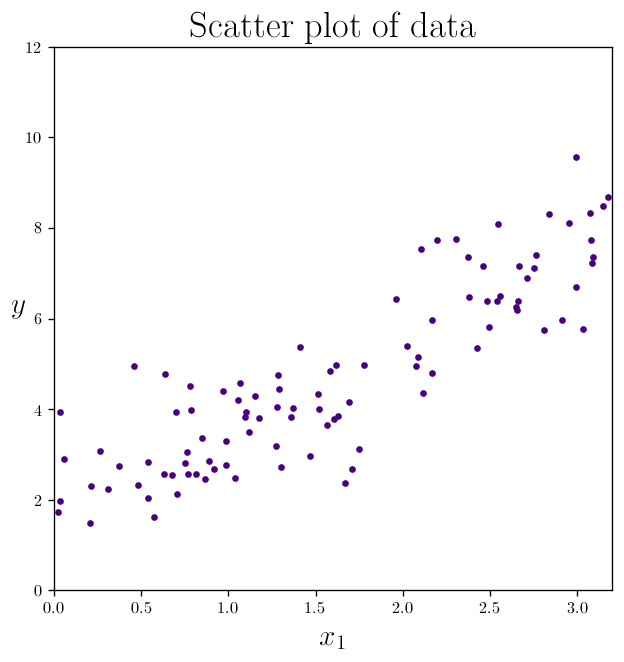

In [128]:
plt.plot(X, y, ".", color="indigo")


plt.title(r"Scatter plot of data")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

plt.axis([0, 3.2, 0, 12])


plt.show()

Adding the dummy feature $x_{j,0} = 1$:

In [129]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

Finding the weights:

According to our previously found solution:
$$
\begin{equation*}
w = (X^\intercal X)^{-1} X^\intercal y
\end{equation*}
$$


In [130]:
inv = np.linalg.inv

weight_best = inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

This is the weights we found:

In [131]:
weight_best

array([[1.68576836],
       [1.88435074]])

Now that we have the best weights, we can make a prediction about the following $X_{new}$: 

In [132]:
X_new = np.array([[0], [3.2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

And this is the prediction vector we got:

In [133]:
y_predict = X_new_b.dot(weight_best)
y_predict

array([[1.68576836],
       [7.71569071]])

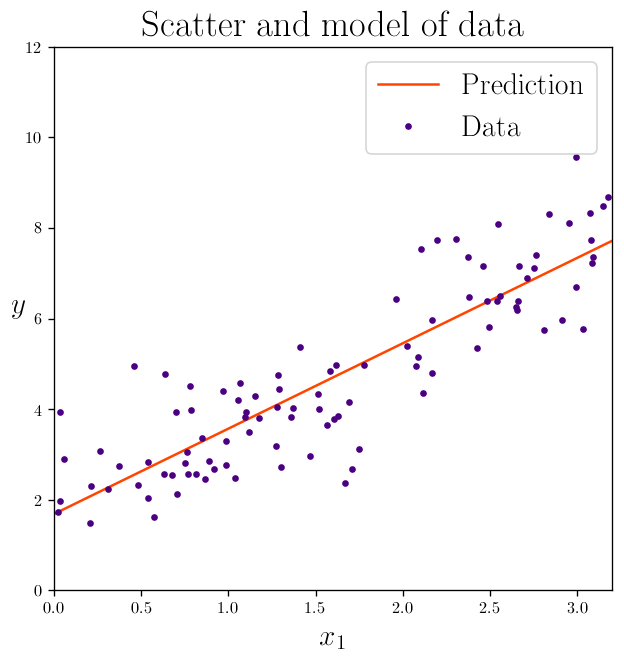

In [134]:
plt.plot(X_new, y_predict, "-", color="orangered", label="Prediction")
plt.plot(X, y, ".", color="indigo", label="Data")


plt.title(r"Scatter and model of data")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$y$", rotation=0,)

plt.legend(fontsize = 18)
plt.axis([0, 3.2, 0, 12])


plt.show()

Now let's use the [skit-learn](https://scikit-learn.org/stable/) library to do the same thing:

In [135]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

After defining our `lin_reg` model, let's fit the data:

In [136]:
lin_reg.fit(X, y)

LinearRegression()

In [137]:
print("The intercept of the linear model:",  lin_reg.intercept_)
print("The slope of the linear model:",  lin_reg.coef_)

The intercept of the linear model: [1.68576836]
The slope of the linear model: [[1.88435074]]


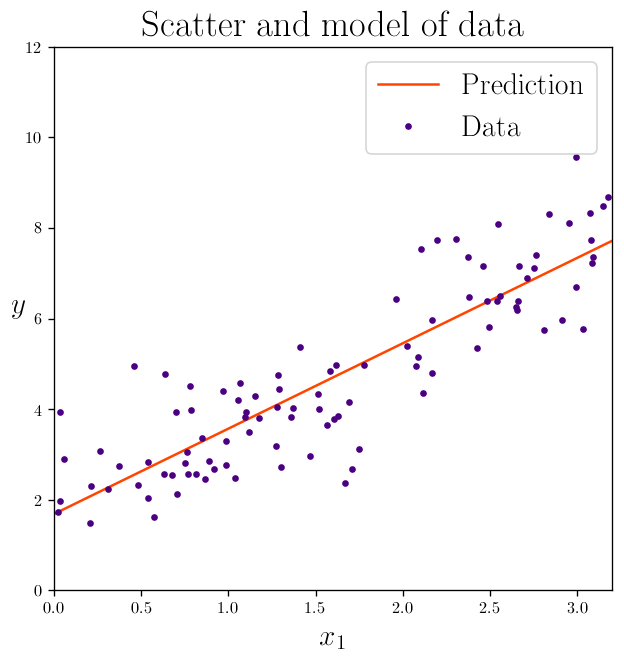

In [138]:
x_span = np.array([0, 3.2])
X_span = x_span.reshape((len(x_span), 1))


plt.plot(x_span, lin_reg.predict(X_span), "-", color="orangered", label="Prediction")
plt.plot(X, y, ".", color="indigo", label="Data")

plt.title(r"Scatter and model of data")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$y$", rotation=0,)

plt.legend(fontsize = 18)
plt.axis([0, 3.2, 0, 12])


plt.show()

## Computational complexity:

### Number of features:

Analytical solution computation time depends on the required time for inversing a matrix which is 
between $O(n^{2.373})$ for optimized **Coppersmith–Winograd** like algorithms and $O(n^3)$ for usual **Gauss-Jordan** elimination when $n$ is the number of features. 


So you can see that doubling the number of features will require 5 to 8 times more computation time, which means when are dealing with large number of features we should think about better ways of finding the model.


### Number of examples in training set:

One of the strongest features of the anayltical solution is that the computational time scales linearly which means $O(n)$ which is very reasonable for large datasets. (As long as you can fit your data into your memory)


source: https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations

For cases that the straightforward method is not suitable we can use optimization. One of the the most general optimization for finding the optimal solution is **Gradient Descent (GD)**.

# ============================

# **Week 8**

## Machine Learning: Gradient Descent




# ============================

# Gradient Descent:


The basic idea is to tweak the parameters until you reach to the optimal solution. So the idea is to make best decision locally. So finding the gradient at each point starting from some **random initialization** and moving along the direction of the gradient (or oppose for finding minimum) till we reach to the optimal point with zero gradient. Imagine your hiking on the mountain an trying to get to the peak in the most. You can make the decision to move along the path that makes the maximum change in height. That's how can we reach to the top in minimal fashion.

In [151]:
_x_ = np.linspace(-10, 10)
_y_ = np.linspace(-10, 10)

X1, Y1 = np.meshgrid(_x_, _y_)

Z1 = X1**2 + Y1**2


_movements_X = np.array([-10, -7, -4, -2, -1, 0])
_movements_Y = np.array([-10, -7, -4, -2, -1, 0])

_movements_Z = _movements_X**2 + _movements_Y**2


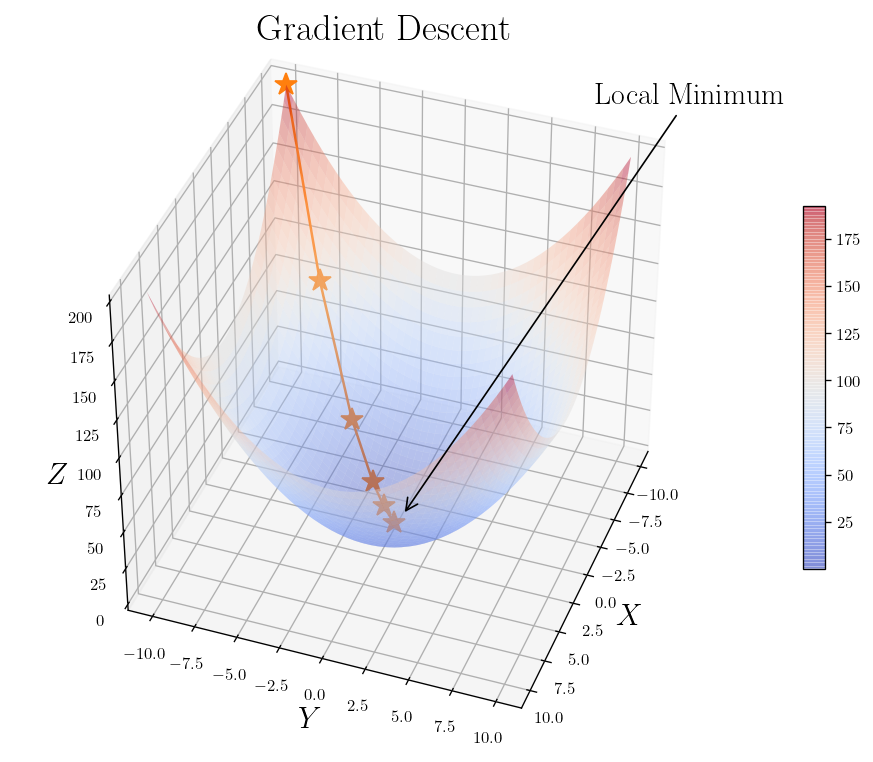

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')


# Plot the surface.
surf = ax.plot_surface(X1, Y1, Z1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True,
                       alpha = 0.4)

ax.plot(_movements_X, _movements_Y, _movements_Z, "*-", markersize= 14,)

plt.annotate("Local Minimum", xy=(0.0022, -0.035), xytext=(0.05,0.07), arrowprops={"arrowstyle" : "->"})

# ax.text(9, 0, 0, "red", color='red')


plt.title(r"Gradient Descent", y =1.05)

ax.view_init(40, 20)

ax.set_xlabel("$X$")
ax.set_ylabel("$Y$")
ax.set_zlabel("$Z$")

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=16)

plt.show()


One of the most important parameters in the GD is the **learning rate**. (learning rate hyperparameter) And one of the important tasks is to select this wisely otherwise too small learning rate makes the algorthim too long to converge and if it is too large it can miss the optimal point.



The figure above is for the case that we have a **global** minimum and a **continuous** and **convex** function (line between any two points on the surface does not got through the surface) 


In this special case of linear regression we deal with a function that has all these features which make the GD to get arbitrary close to the global minimum within given learning rate reach. Another thing to remember is that we can have different time of convergence if the features have different scales. (unnormalized features) So a good practice is to scale the features first then apply GD algorithm.

# Linear regression with batch gradient descent:


The first thing we should do is to find the cost/loss function ($L$) and the gradient of the cost function with respect to it's parameters ($w_j$) so basically we need to find the following:

$$
\begin{equation*}
\frac{dL}{d\vec{w}}|_{X} = \vec{\nabla}_{w_i} L(X, \vec{w}) = \vec{\nabla}_{w_i} L_2(X, \vec{w})
\end{equation*}
$$

And in the case linear regression we have $L_2$ which is the squared error loss function, so we can let's find the gradient first and then define the steps for walking towards the optimal point on the surface.

$$
\begin{equation*}
\nabla_\vec{w} L_2(X, y, \vec{w})= (\frac{\partial L_2}{\partial w_1}, \frac{\partial L_2}{\partial w_2}, \dots, \frac{\partial L_2}{\partial w_n})
\end{equation*}
$$

$$
\begin{equation*}
L_2(X, \vec{y}, \vec{w}) =  \frac{1}{N} \sum_{j=1}^N (\vec{X_j}.\vec{w} - y_j)^2
\\
\frac{\partial L_2}{\partial w_i} = \frac{2}{N} \sum_{j=1}^N (\vec{X_j}.\vec{w} - y_j) \frac{\partial}{\partial w_j} (\vec{X_j}.\vec{w} - y_j)
\\
\frac{\partial L_2}{\partial w_i} = \frac{2}{N} \sum_{j=1}^N (\vec{X_j}.\vec{w} - y_j) X_{j,i}
\end{equation*}
$$

In [152]:
def L_2(_X_, _y_, _w_):
    # Finding the number of examples and features
    Num = len(_y_) # N
    num = len(_w_) # n
    
    # Reshaping _y_ with shape(1, N) to (N, 1)
    _y_ = np.reshape(_y_, (Num, 1))
    # Reshaping _w_ with shape(1, n) to (n, 1)
    _w_ = np.reshape(_w_, (num, 1))
    
    s_loss = (_X_.dot(_w_)-_y_)
    
    Loss = 1/Num * s_loss.T.dot(s_loss)
    return Loss

In [153]:
def weight_space(_w_): return L_2(X_b, y, _w_)

In [154]:
w0_span = np.linspace(0.5, 3, 100)
w1_span = np.linspace(0.5, 3, 100)

w0, w1 = np.meshgrid(w0_span, w1_span)


z_loss = [(w_0, w_1, weight_space([w_0, w_1])) for _w_0, _w_1 in zip(w0, w1) for w_0, w_1 in zip(_w_0, _w_1)]  
z = np.array([z[2] for z in z_loss])

global_min = min(z)

In [155]:
z = np.reshape(z, (100, 100))

In [156]:
def plot_L_2_Loss_function(angle=[0, 30]):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    from matplotlib.ticker import LinearLocator, FormatStrFormatter

    fig = plt.figure(figsize=(10, 8))
    ax = fig.gca(projection='3d')


    # Plot the surface.
    surf = ax.plot_surface(w0, w1, z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=True,
                           alpha = 0.4)

    ax.scatter3D(weight_best[0], weight_best[1], global_min, s=40, marker="*", label=r"Global minimum")


    plt.title(r"Gradient Descent")
    ax.view_init(angle[0], angle[1])


    ax.set_xlabel("$w_0$")
    ax.set_ylabel("$w_1$")
    ax.set_zlabel("L", rotation = 0)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=16)

    plt.legend(fontsize=14, loc=(0.7, 0.7))
    return fig, ax
    
    

<Figure size 1440x960 with 0 Axes>

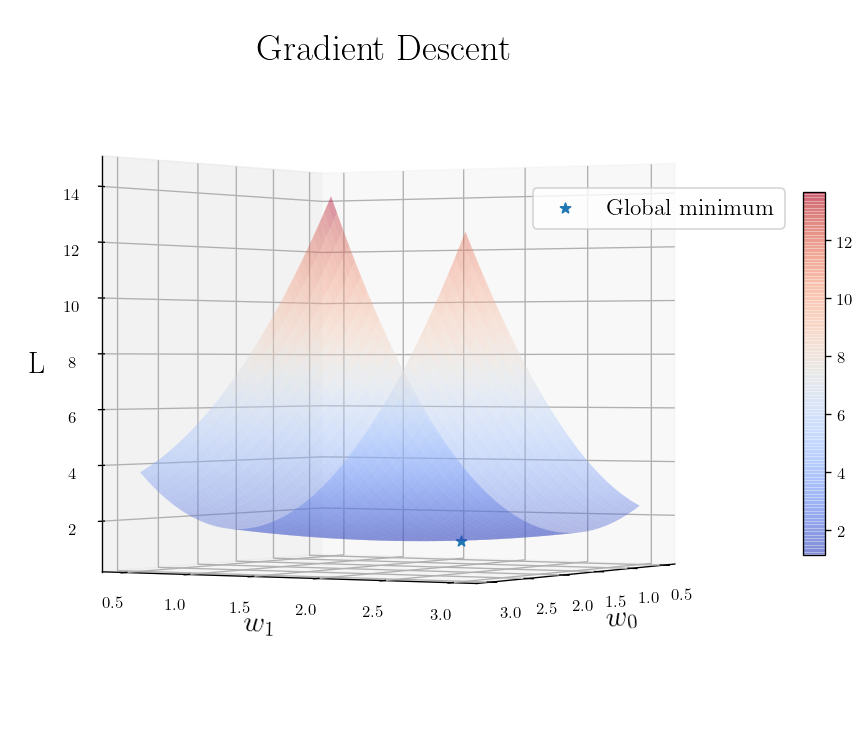

In [45]:
plt.figure(figsize=(12, 8))

plot_L_2_Loss_function()

plt.show()

(<Figure size 1200x960 with 2 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7f9fb3141cc0>)

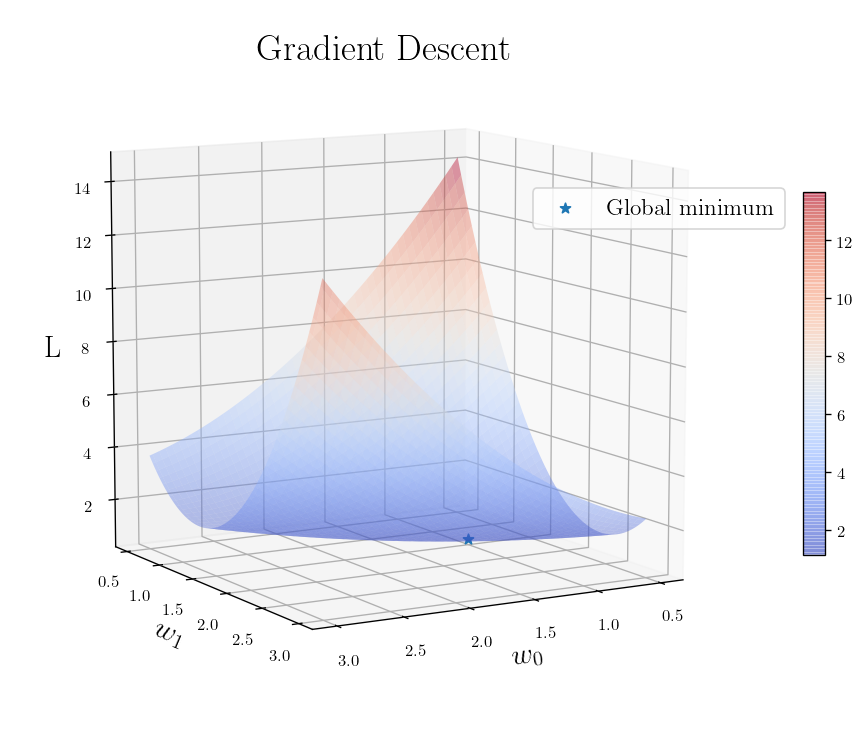

In [46]:
plot_L_2_Loss_function([10, 60])

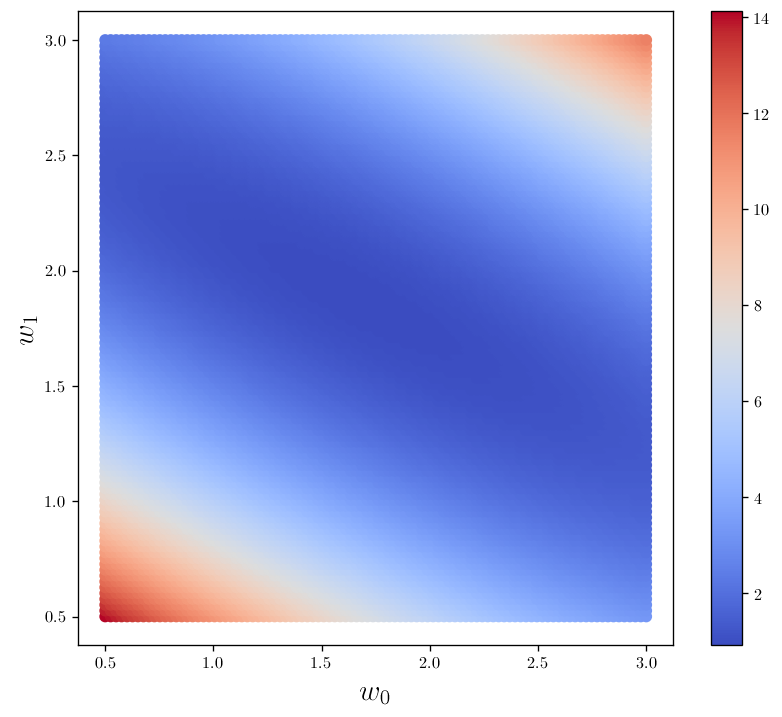

In [158]:
def L_2_heatmap():
    fig = plt.figure(figsize=(8,7))
    plt.scatter(w0, w1, c = z, cmap=cm.coolwarm)

    plt.xlabel(r"$w_0$")
    plt.ylabel(r"$w_1$")

    plt.colorbar()
    return fig

L_2_heatmap()
plt.show()

In [160]:
def Gradient_LR(_X_, _y_, _w_):
    """
    This is the function to find the gradient of the Linear regression
    loss function:
    
    gradient(L_2)_w = (2 / N) * X^T * (X*w - y) 
    
    N: Number of examples
    n: Number of features (including the intercept)
    
    INPUT:
    ======
            _X_ (a matrix of size (N, n)) : 
                                            [[X11=1, X12, ..., X1n],
                                             [X21=1, X22, ..., X2n],
                                             .
                                             .
                                             .
                                             [XN1=1, XN2, ..., XNn]]
           
           
           _y_ (a vector (matrix) of size (N, 1)): [[y1],
                                                    [y2],
                                                    .
                                                    .
                                                    .
                                                    [yN]]
                                                    
                                                
           _w_ (a vector (matrix) of size (n, 1)): [[w0],
                                                    [w1],
                                                    [w2],
                                                    .
                                                    .
                                                    .
                                                    [wn]]
                                                    
    OUTPUT:
    ======
           
            The gradient vector in the shape (n, 1)
     
    """
    
    
    # Finding the number of examples and features
    Num = len(_y_) # N
    num = len(_w_) # n
    
    # Reshaping _y_ with shape(1, N) to (N, 1)
    _y_ = np.reshape(_y_, (Num, 1))
    # Reshaping _w_ with shape(1, n) to (n, 1)
    _w_ = np.reshape(_w_, (num, 1))
        
    
    # single loss: (X.w - y)
    _Loss_ = _X_.dot(_w_) - _y_
    
    # 2/num * X^T (n, N) * loss (N, 1) 
    grad_sum_loss = (2/Num) * _X_.T.dot(_Loss_)
    return grad_sum_loss
    

### Finding learning rate/walking steps

$$
\begin{equation*}
\vec{w}_{next} = \vec{w} - \eta \nabla_{w}{L_2(X, y, w)}
\end{equation*}
$$

In [161]:
def BGD(X_b, y, eta=0.1, n_iterations=100):
    m = len(y)
    theta = np.random.randn(2,1)
    
    theta_list = []
    for iteration in range(n_iterations):
        gradients = Gradient_LR(X_b, y, theta)
        theta = theta - eta * gradients
        theta_list.append(theta)
    return theta, theta_list

def plot_batch_gradient_descent(X, y, theta_l, eta):
    plt.plot(X, y, ".", color="indigo")
    x_0, x_1 = min(X), max(X)
    
    for i, theta in enumerate(theta_l):
        b, m = theta[0], theta[1]
        def f(x): return m*x+b
        colors = ["#039F1B", "orangered"]
        if i==0: 
            color=colors[i] 
        else: 
            color=colors[-1] 
        
        plt.plot([x_0, x_1], [f(x_0), f(x_1)], color=color)
        plt.title(r"$\eta={}$".format(eta))

Now let's plot the _Batch Gradient Descent_ for $\eta = [0.002, 0.02, 0.1, 0.2, 0.4, 0.8]$:

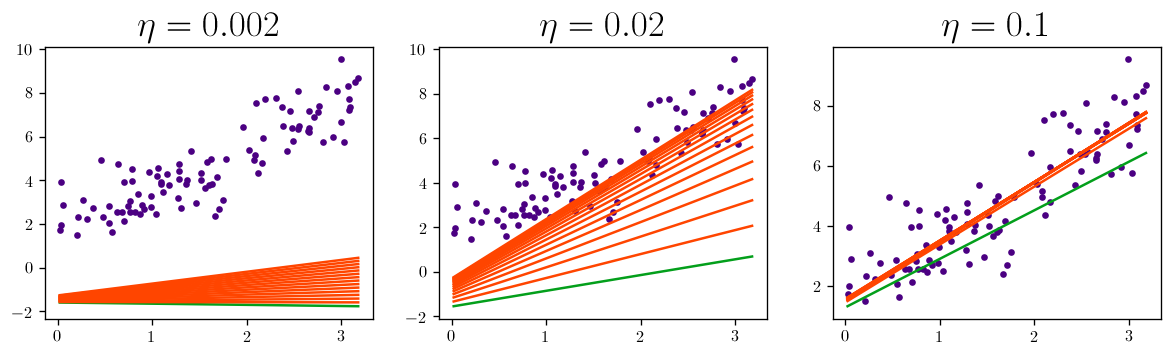

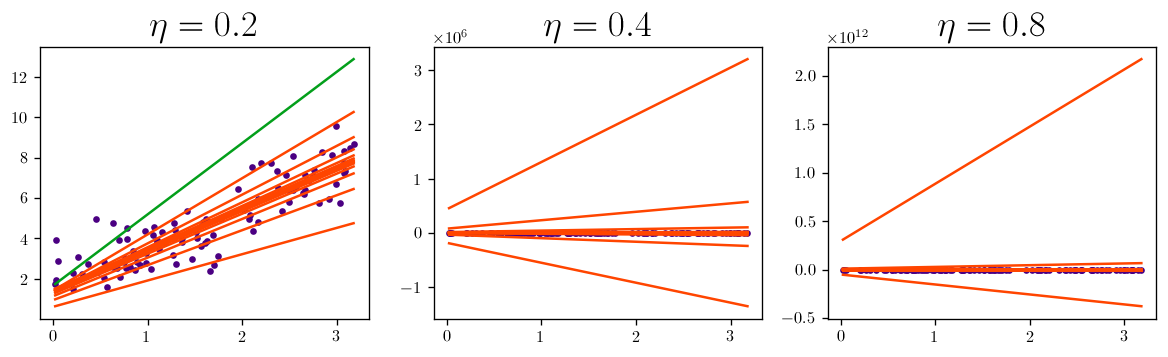

In [162]:
np.random.seed(55)

plt.figure(figsize=(12,3))

etas = [0.002, 0.02, 0.1]
for eta, sp in zip(etas, [131, 132, 133]):
    theta, theta_l = BGD(X_b, y, eta, 15)
    plt.subplot(sp);plot_batch_gradient_descent(X, y, theta_l, eta)

    
plt.figure(figsize=(12,3))
etas = [0.2, 0.4, 0.8]
for eta, sp in zip(etas, [131, 132, 133]):
    theta, theta_l = BGD(X_b, y, eta, 15)
    plt.subplot(sp);plot_batch_gradient_descent(X, y, theta_l, eta)



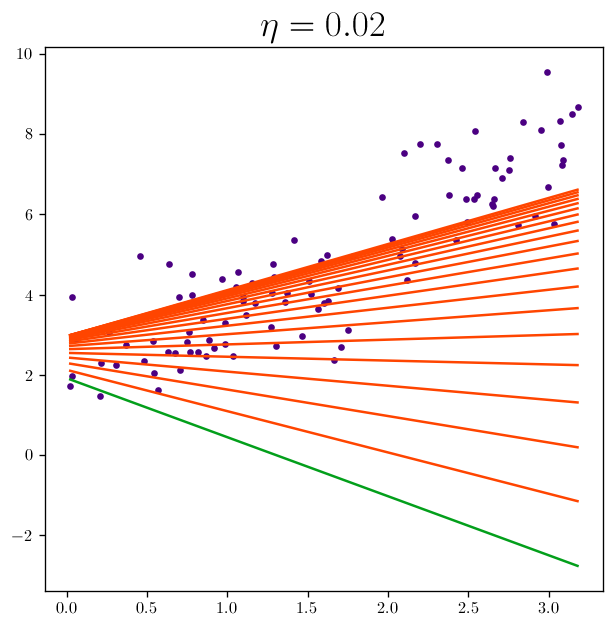

In [163]:
theta, theta_l = BGD(X_b, y, eta=0.02, n_iterations=20)

fig_xy_1 = plot_batch_gradient_descent(X, y, theta_l, eta = 0.02)

In [164]:
theta, theta_l = BGD(X_b, y, eta=0.02, n_iterations=105)

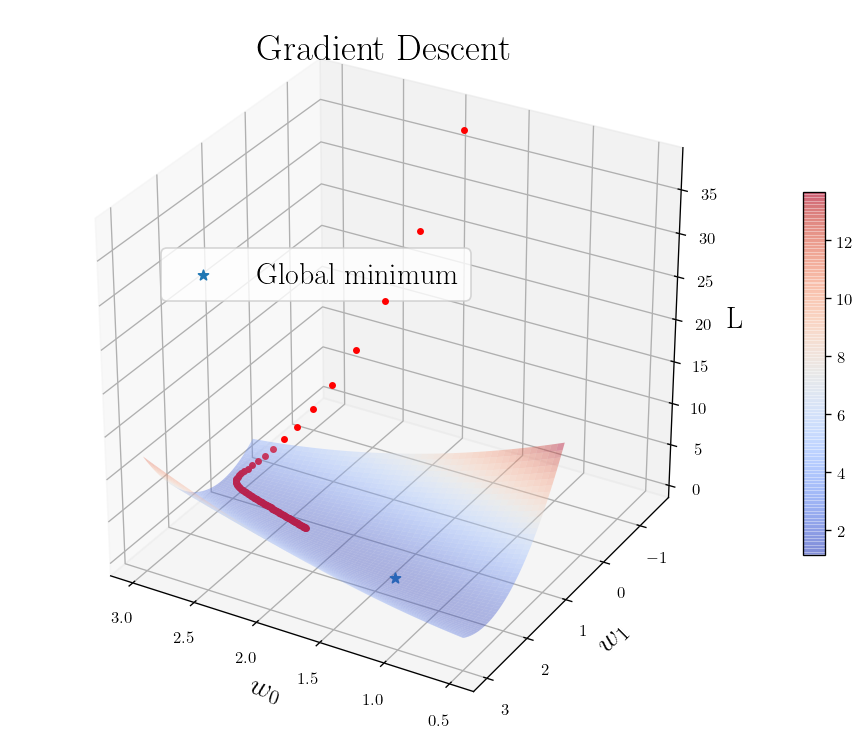

In [52]:
fig, ax = plot_L_2_Loss_function([30, 120])

for i, theta in enumerate(theta_l):
    ax.scatter3D(theta[0], theta[1], weight_space(theta), s=40, marker=".", color = "r")
    
plt.legend(loc=(0.2,0.6))

plt.show()

Text(0.5, 1.0, 'Gradient Descent')

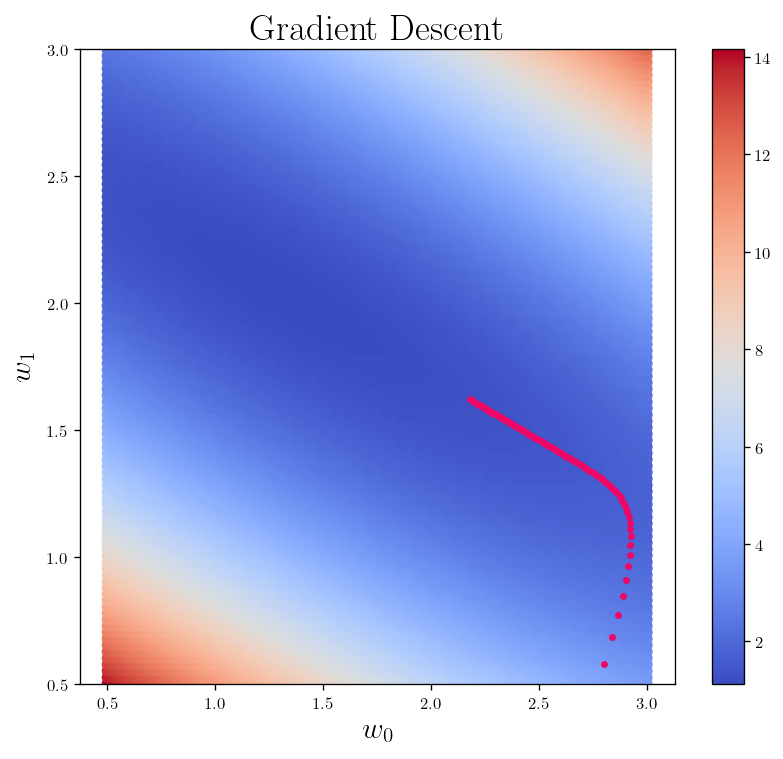

In [62]:
fig_h_1 = L_2_heatmap()

for i, theta in enumerate(theta_l):
    plt.scatter(theta[0], theta[1],  s=40, marker=".", c = "#EE0766")

plt.ylim(0.5,3)

plt.title(r"Gradient Descent")

Text(0.5, 0, 'Number of iterations')

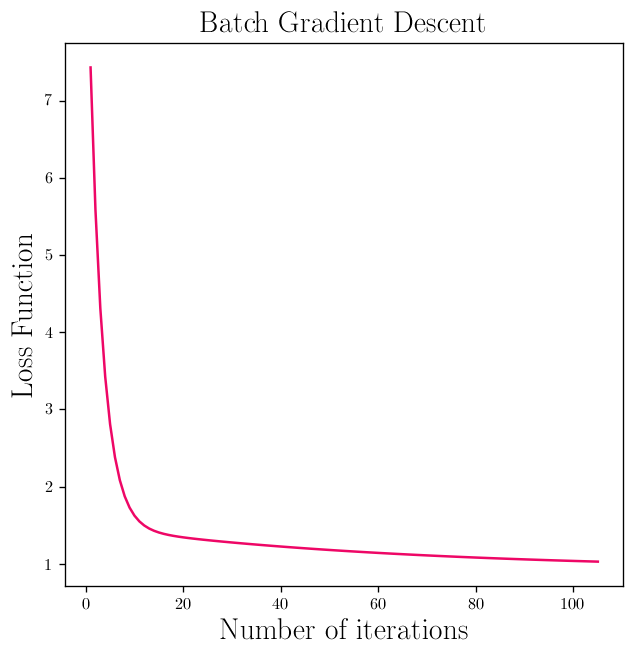

In [168]:
l_2 = []
for theta in theta_l:
    l_2.append(weight_space(theta))

l_2 = [l2[0] for l2 in l_2]

plt.title(r"Batch Gradient Descent", fontsize=18)
fig__loss_1 = plt.plot(range(1, len(l_2)+1), l_2,  c = "#EE0766")

plt.ylabel(r"Loss Function")
plt.xlabel(r"Number of iterations")


The convergence of the batch gradient descent when the function (cost function) is convex and it has continuous derivative is $O(n^{-1})$ in which $n$ is the number of iterations. So if you are looking to get 10 time more accurate you need to iterate 10 times more. (With constant learning rate) 

Now let's take a look at another way for finding the optimal point on our cost function:

# Optimization: Stochastic Gradient Descent


In the stochastic gradient descent (SGD) we are going to update the parameter for each example instead of finding $L_2$ on all of the examples:

### Finding learning rate/walking steps

$$
\begin{equation*}
\vec{w}_{next} = \vec{w} - \eta \nabla_{w}{L_2(X_j, y_j, \vec{w})}
\end{equation*}
$$

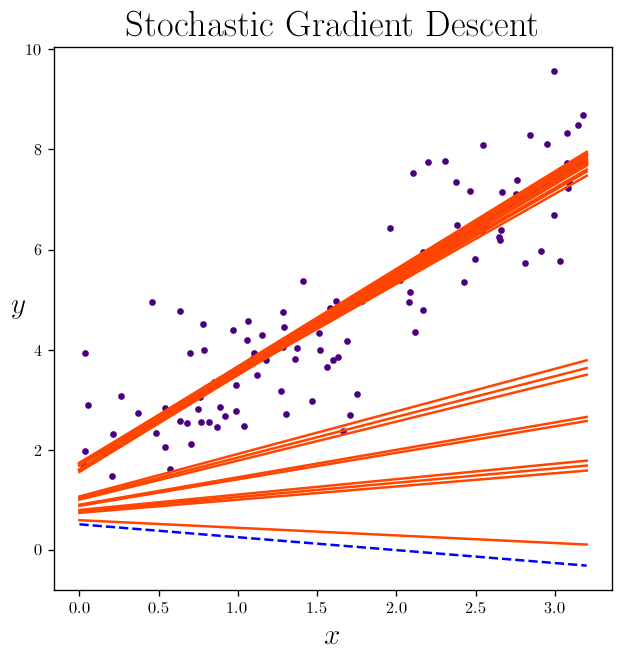

In [169]:
eta = 0.009
num_interation = 200
np.random.seed(110)
theta = np.random.randn(2,1)  # random initialization
theta_batch = [theta]


fig_xy_2 = plt.scatter(X, y, marker=".", color="indigo")

j=0
for iteration in range(num_interation):
    lenght_y = len(y)
    
    for i in range(lenght_y):
        random_index = np.random.randint(lenght_y)
        xi =  X_b[random_index]
        yi = y[random_index]
        
        
        gradients = 2 * xi*(xi.dot(theta) - yi)
        gradients = gradients.reshape(2,1)
        theta = theta - eta * gradients
        theta_batch.append(theta)
        
        if i<10 and iteration in {0, 1, 43, 199}:
            y_predict = X_new_b.dot(theta) 
            

            
            style = "orangered" if i > 0 else "b--"         # not shown
            plt.plot(X_new, y_predict, style, label="iteration"+str(iteration+1))

plt.title(r"Stochastic Gradient Descent")
plt.ylabel(r"$y$", rotation=0)
plt.xlabel(r"$x$")

plt.show()

In [170]:
theta_batch = np.array(theta_batch).reshape(len(theta_batch),2)

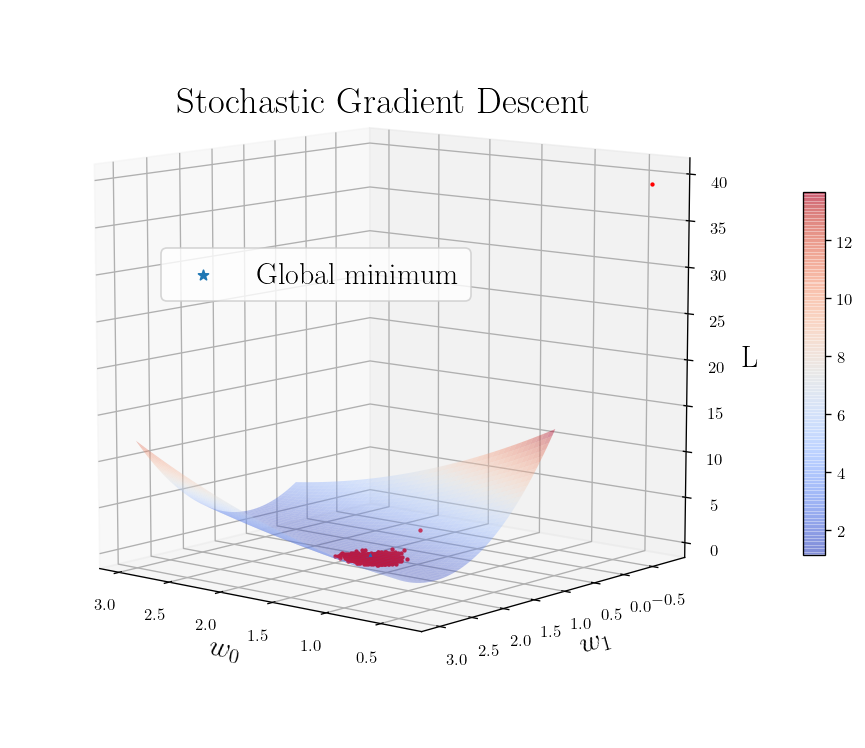

In [70]:
fig, ax = plot_L_2_Loss_function([10, 130])

for i, theta in enumerate(theta_batch[::20]):
    ax.scatter3D(theta[0], theta[1], weight_space(theta), s=10, marker=".", color = "r")
    
plt.legend(loc=(0.2,0.6))
plt.title(r"Stochastic Gradient Descent")

plt.show()

(0.5, 3.0)

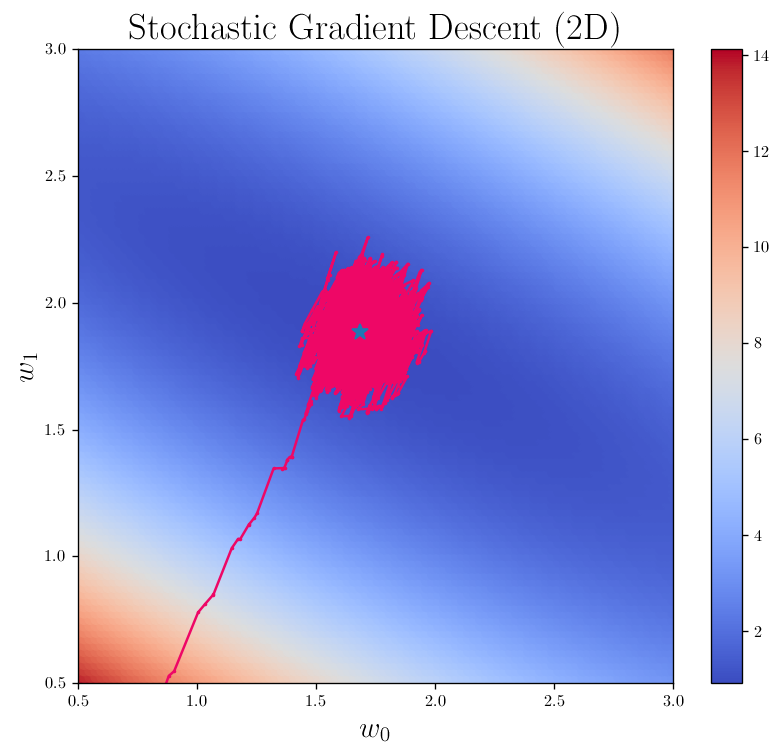

In [172]:
fig_h_2 = L_2_heatmap()

plt.title(r"Stochastic Gradient Descent (2D)")

plt.scatter(theta_batch[:,0], theta_batch[:, 1],  s=5, marker=".", c = "#EE0766")

plt.plot(theta_batch[:,0], theta_batch[:, 1],  color = "#EE0766")


plt.plot(weight_best[0], weight_best[1], marker="*", markersize =10)

plt.xlim(0.5, 3)
plt.ylim(0.5, 3)

As you can see the loss function does not always decrease:

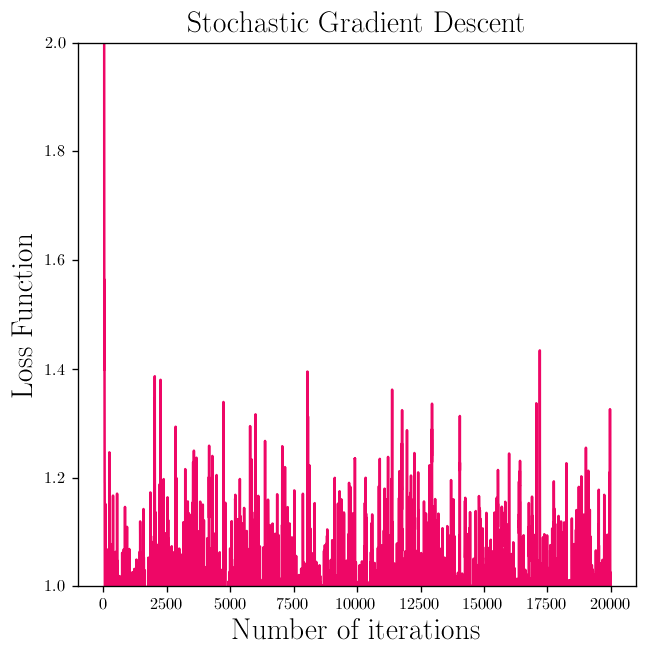

In [173]:
l_2 = []
for theta in theta_batch:
    l_2.append(weight_space(theta))

l_2 = [l2[0] for l2 in l_2]

plt.title(r"Stochastic Gradient Descent", fontsize=18)
fig__loss_2 = plt.plot(range(1, len(l_2)+1), l_2,  c = "#EE0766")

plt.ylabel(r"Loss Function")
plt.xlabel(r"Number of iterations")

plt.ylim(1,2)

plt.show()

Let's define a learning schedule by changing the learning rate: (Making adaptive learning rate)

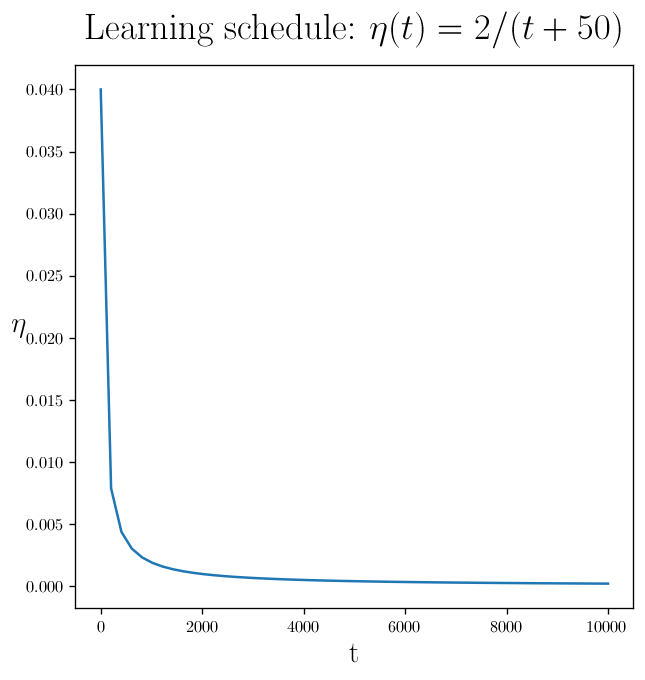

In [174]:
t0, t1 = 2, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)


t_span = np.linspace(0, 10000)
plt.plot(t_span, np.vectorize(learning_schedule)(t_span))


Title = r"Learning schedule: " + r"$\eta(t) = {}/(t+{})$".format(t0, t1)
plt.title(Title, y=1.03)


plt.xlabel(r"t")
plt.ylabel(r"$\eta$", rotation = 0)

plt.show()

This is a function to find the optimal point by moving randomly within data points and updating the value of the weights in according to the gradient of the loss function at that point. So we should remember that the loss function here only depend on the position of one point every time not the poisition of all the data points which means that although we are moving along the opposite of the gradient of the loss function, we could perform worse since that the gradient is only representative of the loss function at that particular point and not necesseraily rest of the data points. That is why we see huge fluctuation in the performance (Loss function vs number of iterations)

In [176]:
def SGD(X_b, y, eta=0.02, num_interation=100, seed=110, schedule=None):
    """
    Stochastic Gradient Descent for linear regression:
    
    This is a function to find the optimal point by moving 
    randomly within data points and updating the  value of
    the weights in according to the gradient  of the  loss 
    function at that point. So we should remember that the 
    loss function here only depend on  the position of one 
    point every time not the poisition  of  all  the  data 
    points which means that although  we  are moving along 
    the opposite of the gradient of  the loss function, we 
    could perform worse  since that  the  gradient is only 
    representative of the loss function at that particular 
    point and not necesseraily rest of the data points. 
    
    
    INPUT:
    ------
    
     
    """
    import numpy as np
    
    # Definig the learning schedule function with the 
    # following learning schedule hyperparameters :
    t0, t1 = 2, 50 
    
    def learning_schedule(t):
        return t0 / (t + t1)
    
    # pass the seed to the numpy.random.seed 
    np.random.seed(seed)
    
    # randomly assigning weights with the size of of number of features 
    theta = np.random.randn(len(X_b[0]),1)  # random initialization
    
    # a list that will store every weights steps
    theta_batch = [theta]
    
    # A for loop for the number of iteratations of going through the data
    # the default number is 100
    for iteration in range(num_interation):
        # finding number of examples
        lenght_y = len(y)
        
        # A for loop for going through every example, and to update the 
        # weights accordingly
        for i in range(lenght_y):
            # choosing a random index
            random_index = np.random.randint(lenght_y)
            
            # Finding corresponding data for the index
            xi =  X_b[random_index]
            yi = y[random_index]

            # Finding the gradient at this point (xi, yi)
            gradients = 2 * xi*(xi.dot(theta) - yi)
            gradients = gradients.reshape(2,1)
            
            # if it is true will update the learning rate every time, look 
            # at the learning_schedule function for more details about this 
            # option
            if schedule:
                eta = learning_schedule(lenght_y*(iteration)+i)
                
            # Update the weights according to the gradient 
            theta = theta - eta * gradients
            
            # Store it in the weights list
            theta_batch.append(theta)
            
    return theta_batch      
    
theta_ = SGD(X_b, y, 0.0001, schedule=True)

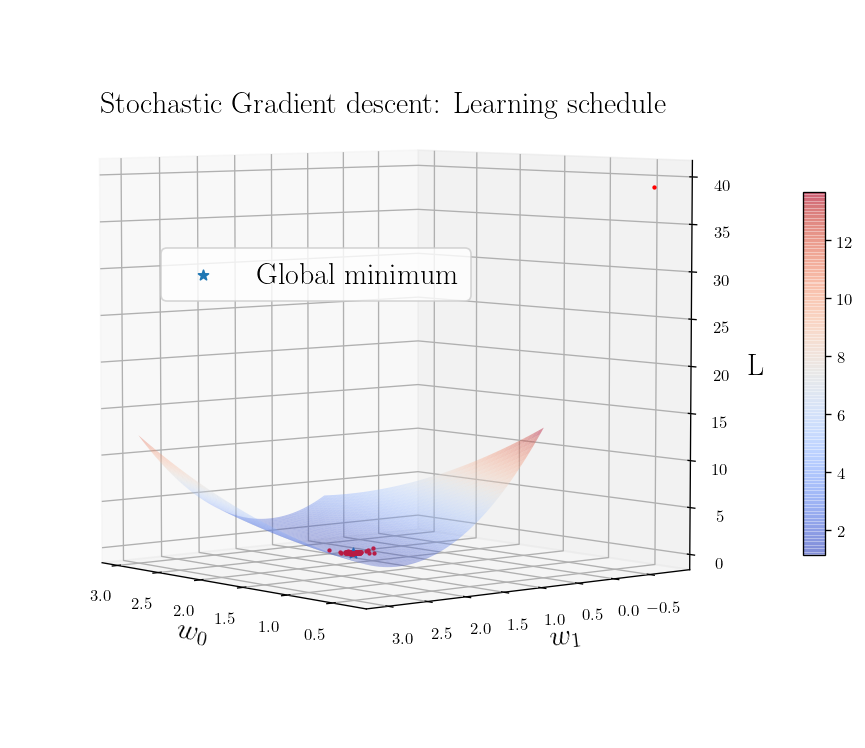

In [77]:
fig, ax = plot_L_2_Loss_function([5, 140])

for i, theta in enumerate(theta_[::20]):
    ax.scatter3D(theta[0], theta[1], weight_space(theta), s=10, marker=".", color = "r")
    
plt.legend(loc=(0.2,0.6))

plt.title(r"Stochastic Gradient descent: Learning schedule", fontsize = 18)


plt.show()

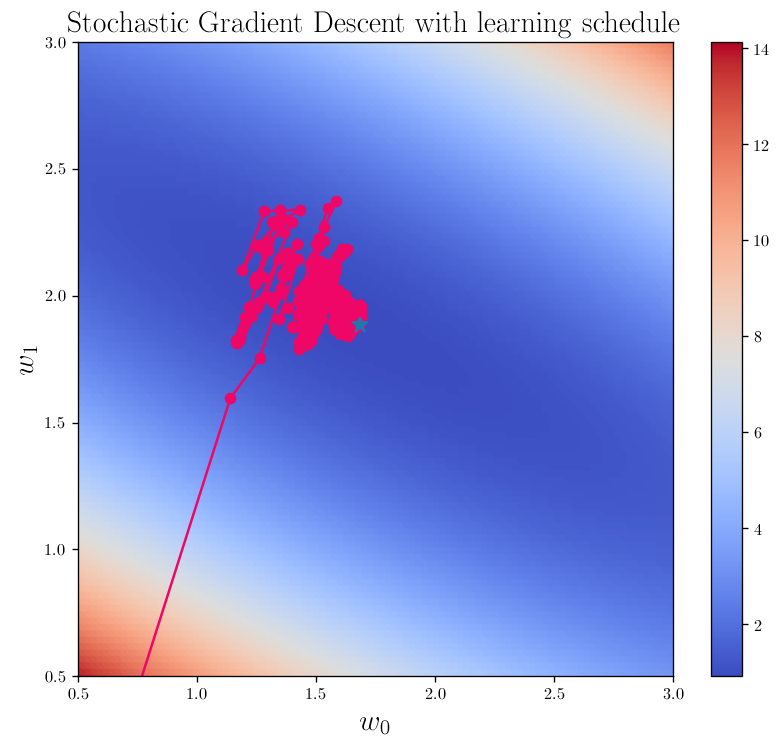

In [180]:
L_2_heatmap()
theta_ = np.array(theta_).reshape(len(theta_),2)

fig_h_3 = plt.scatter(theta_[:,0], theta_[:, 1], color="#EE0766")#  s=5, marker=".", c = "#EE0766")
plt.plot(theta_[:,0], theta_[:, 1], color="#EE0766")#  s=5, marker=".", c = "#EE0766")

plt.plot(weight_best[0], weight_best[1], marker="*", markersize=10)

plt.xlim(0.5, 3)
plt.ylim(0.5, 3)

plt.title(r"Stochastic Gradient Descent with learning schedule", fontsize = 18)

plt.show()

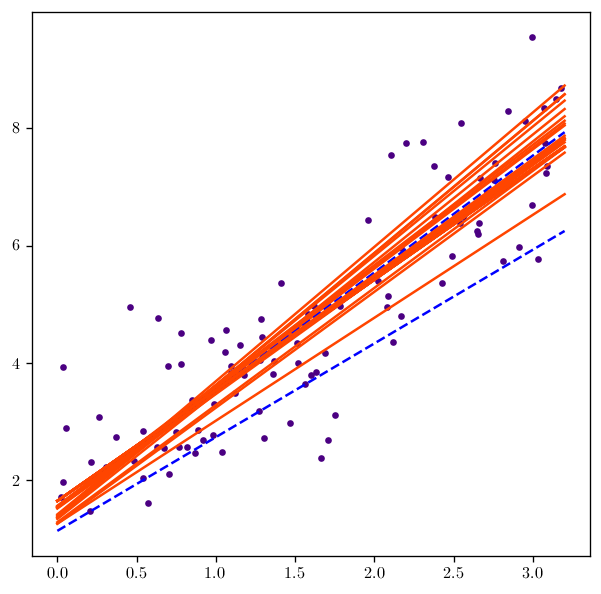

In [181]:
def Find_plot_SGD(X, y, eta=0.02, num_interation=100, seed=110, schedule=None):
    np.random.seed(seed)
    theta = np.random.randn(2,1)  # random initialization
    theta_batch = [theta]

    
    fig = plt.scatter(X, y, marker=".", color="indigo")

    j=0
    for iteration in range(num_interation):
        lenght_y = len(y)

        for i in range(lenght_y):
            random_index = np.random.randint(lenght_y)
            xi =  X_b[random_index]
            yi = y[random_index]


            gradients = 2 * xi*(xi.dot(theta) - yi)
            gradients = gradients.reshape(2,1)
            
            if schedule:
                eta = learning_schedule(lenght_y*(iteration)+i)
                
            theta = theta - eta * gradients
            theta_batch.append(theta)

            if i<10 and iteration in {0, 1, 43, 199}:
                y_predict = X_new_b.dot(theta) 



                style = "orangered" if i > 0 else "b--"         # not shown
                plt.plot(X_new, y_predict, style, label="iteration"+str(iteration+1))
    return fig, theta_batch      
    
fig_xy_3, theta_ = Find_plot_SGD(X, y, 0.001, schedule=True)

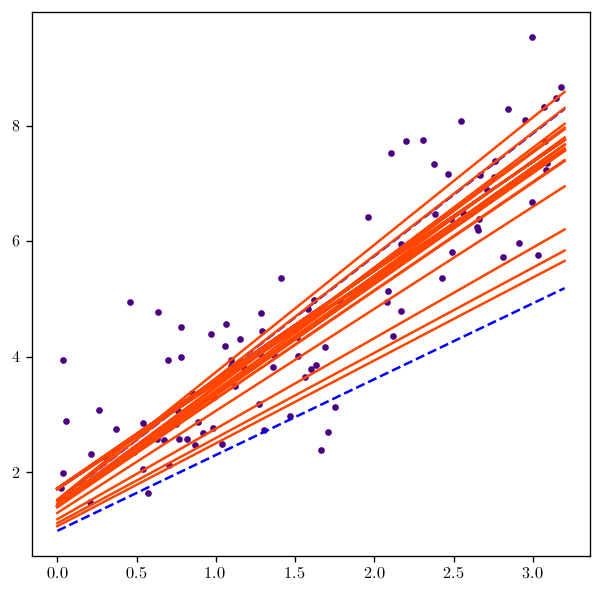

In [183]:
num = 1000
seed = 988

fig2, theta_2_lis = Find_plot_SGD(X,y, num_interation=num, seed=seed, schedule=True)

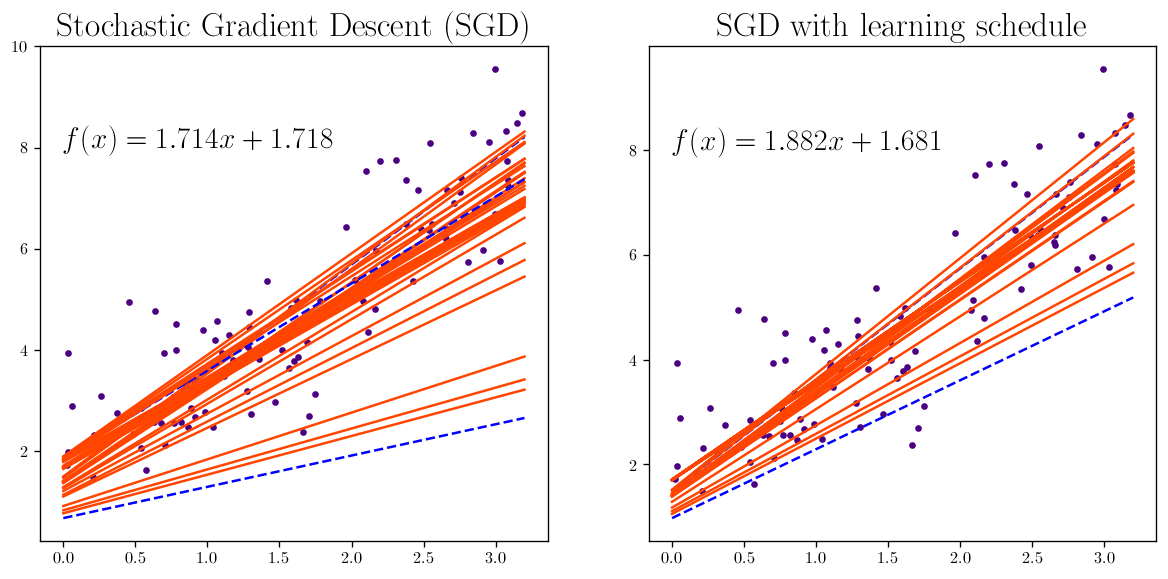

In [184]:
plt.figure(figsize=(12,12))
plt.subplot(221 );
fig1, theta_1_lis = Find_plot_SGD(X,y, num_interation=num, seed=seed, )


plt.text(0, 8, "$f(x) = {}x + {}$".format(round(float(theta_1_lis[-1][1]), 3), round(float(theta_1_lis[-1][0]), 3)))
plt.title(r"Stochastic Gradient Descent (SGD)", fontsize=20)


plt.subplot(222);
fig1, theta_1_lis = Find_plot_SGD(X,y, num_interation=num, seed=seed, schedule=True)


plt.text(0, 8, "$f(x) = {}x + {}$".format(round(float(theta_1_lis[-1][1]), 3), round(float(theta_1_lis[-1][0]), 3)))
plt.title(r"SGD with learning schedule", fontsize=20)

plt.show()

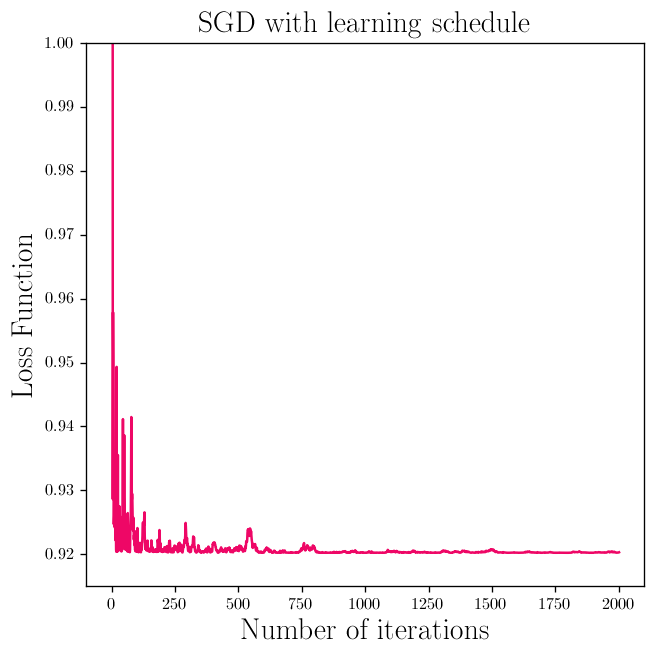

In [193]:
l_2 = []
for theta in theta_2_lis:
    l_2.append(weight_space(theta))

l_2 = [l2[0] for l2 in l_2[::50]]

plt.title(r"SGD with learning schedule", fontsize=18)
fig__loss_3 = plt.plot(range(1, len(l_2)+1), l_2,  c = "#EE0766")

plt.ylabel(r"Loss Function")
plt.xlabel(r"Number of iterations")

plt.ylim(0.915, 1)

plt.show()

Now let's take a look at the same thing but using `sklearn.linear_model.SGDRegressor`

In [194]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=10000, 
                       tol=-np.infty, 
                       penalty=None, 
                       eta0=0.1, 
                       random_state=88)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=10000, penalty=None, random_state=88, tol=-inf)

In [195]:
sgd_reg_optimal = SGDRegressor(max_iter=10000, 
                             tol=-np.infty, 
                             penalty=None,
                             loss="squared_loss", 
                             early_stopping=True, 
                             learning_rate="optimal",
                             random_state=88)

sgd_reg_optimal.fit(X, y.ravel())

SGDRegressor(early_stopping=True, learning_rate='optimal', max_iter=10000,
             penalty=None, random_state=88, tol=-inf)

In [196]:
sgd_reg_valid = SGDRegressor(max_iter=10000, 
                             tol=-np.infty, 
                             penalty=None,
                             loss="squared_loss", 
                             early_stopping=True, 
                             learning_rate="adaptive", 
                             validation_fraction=0.1,
                             random_state=88)

sgd_reg_valid.fit(X, y.ravel())

SGDRegressor(early_stopping=True, learning_rate='adaptive', max_iter=10000,
             penalty=None, random_state=88, tol=-inf)

In [197]:
print("Intercept: ", sgd_reg.intercept_, "Coefficient: ", sgd_reg.coef_, "with SGD from skit-learn")
print("Intercept: ", sgd_reg_valid.intercept_, "Coefficient: ", sgd_reg_valid.coef_, "with SGD with validations from skit-learn")
print("Intercept: ", sgd_reg_optimal.intercept_, "Coefficient: ", sgd_reg_optimal.coef_, "with Optimal SGD from skit-learn")


print("Intercept: ", weight_best[0], "Coefficient: ", weight_best[1], "with Analytical")

Intercept:  [1.68684797] Coefficient:  [1.89023985] with SGD from skit-learn
Intercept:  [1.73185394] Coefficient:  [1.81075161] with SGD with validations from skit-learn
Intercept:  [1.72945352] Coefficient:  [1.80466957] with Optimal SGD from skit-learn
Intercept:  [1.68576836] Coefficient:  [1.88435074] with Analytical


# Decision Trees:

First start with a special case of **Regression or Classification Tree (CART)**:


A **node** which represents a single input $X$ and we split the data. And there are **Leaf nodes** that are the end results of each branch. 

Take a look at the following example:

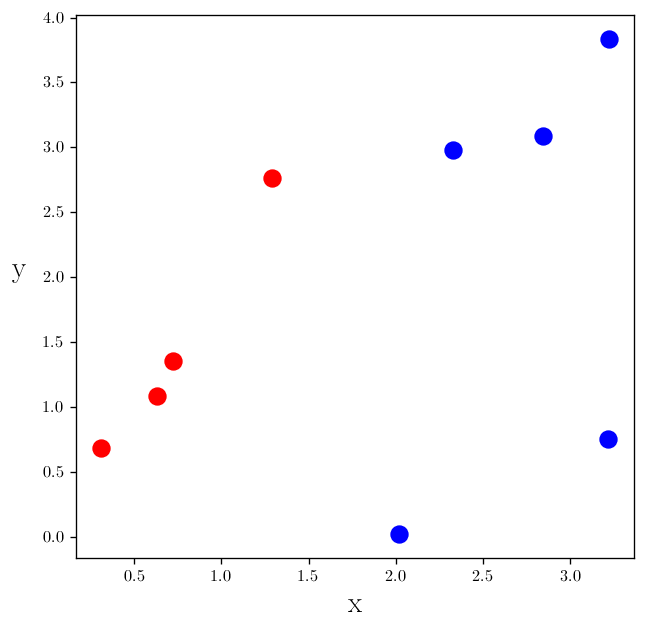

In [198]:
np.random.seed(22)

x_c1 = 1.5 * np.random.random(4)
y_c1 = 4 * np.random.random(4)

x_c2 = 2 + 1.5 * np.random.random(5)
y_c2 = 4 * np.random.random(5)

plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
    
plt.text(s=r"y", x=-0.2, y=2, rotation=0)
plt.xlabel(r"x")

plt.show()

As you can see making a decision about a color of a given point we can just use the $x$ values. For example we can say any point with $x>1.8$ is blue and the rest are red.

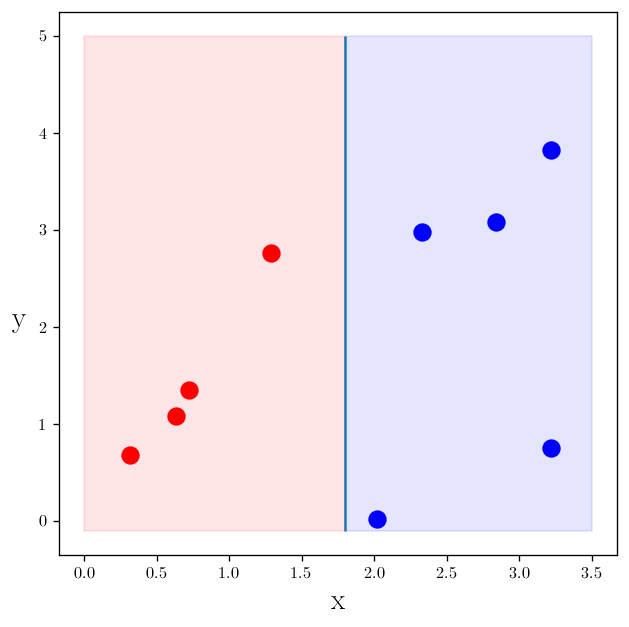

In [199]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
    
plt.vlines(1.8, -0.1, 5)

plt.fill_between([0, 1.8], [-0.1, -0.1], [5, 5], color="red", alpha=0.1)
plt.fill_between([1.8, 3.5], [-0.1, -0.1], [5, 5], color="blue", alpha=0.1)

    
plt.text(s=r"y", x=-0.5, y=2, rotation=0)
plt.xlabel(r"x")

plt.show()

So this is how our decision tree looks like: 

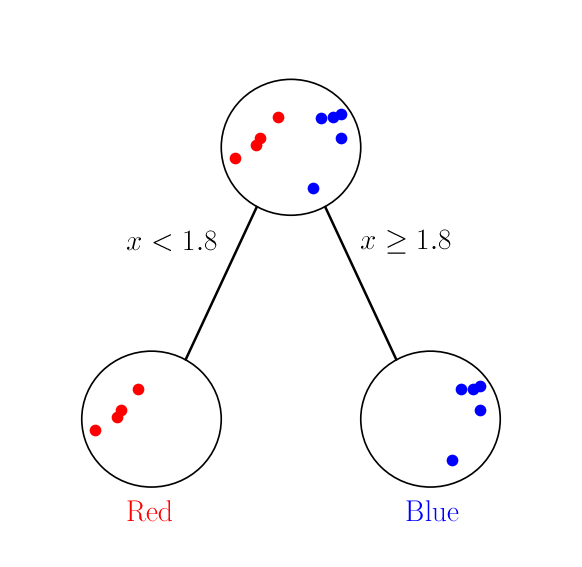

In [200]:
from _plotting_ import _plot_trees_

_plot_trees_()

plt.show()

Now let's make another class:

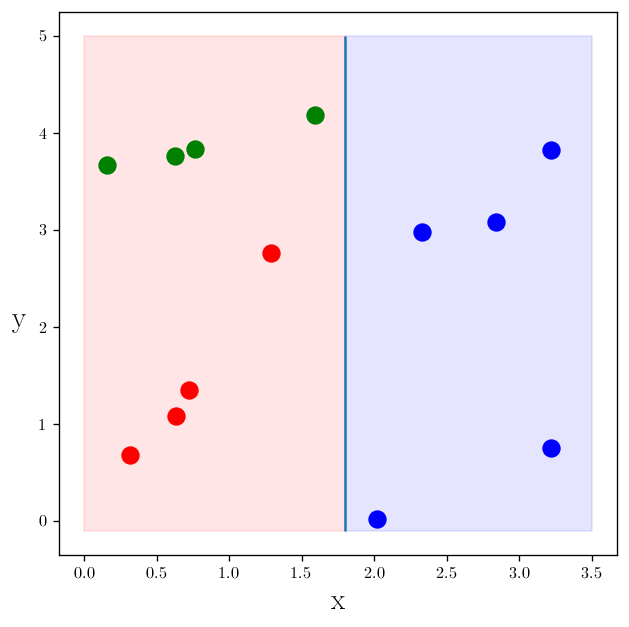

In [201]:
np.random.seed(22)
x_c3 = -0.3 + 2.2*np.random.random(4)
y_c3 = 3.5 + np.random.random(4)

plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
plt.plot(x_c3, y_c3, "g.", markersize=20)


plt.vlines(1.8, -0.1, 5)

plt.fill_between([0, 1.8], [-0.1, -0.1], [5, 5], color="red", alpha=0.1)
plt.fill_between([1.8, 3.5], [-0.1, -0.1], [5, 5], color="blue", alpha=0.1)

    
plt.text(s=r"y", x=-0.5, y=2, rotation=0)
plt.xlabel(r"x")

plt.show()

In the plot you see the first criteria is not sufficient. So let's tweak it a bit. As you can see our classifier is still good for making decision about blue. But for making decision about green and red, so we need another classifier like $y<3.1$ if $x<1.8$:

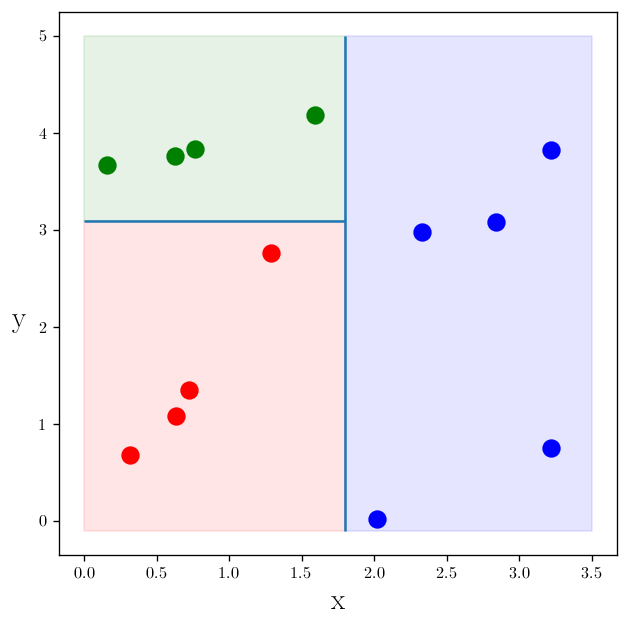

In [202]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
plt.plot(x_c3, y_c3, "g.", markersize=20)


plt.vlines(1.8, -0.1, 5)
plt.hlines(3.1, 0, 1.8)

plt.fill_between([0, 1.8], [-0.1, -0.1], [3.1, 3.1], color="red", alpha=0.1)
plt.fill_between([1.8, 3.5], [-0.1, -0.1], [5, 5], color="blue", alpha=0.1)
plt.fill_between([0, 1.8], [3.1, 3.1], [5, 5], color="green", alpha=0.1)
    
plt.text(s=r"y", x=-0.5, y=2, rotation=0)
plt.xlabel(r"x")

plt.show()

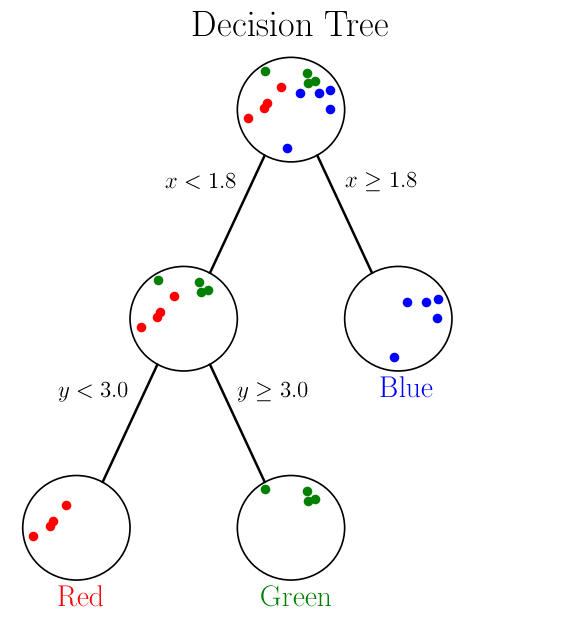

In [203]:
from _plotting_ import _plot_tree_2

_plot_tree_2()
plt.show()